<a href="https://colab.research.google.com/github/sdw1621/0_LG/blob/main/CH04_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8_%EC%88%9C%EC%84%9C_%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<예제 4-3> 한글 폰트 오류 해결

**차트에서 한글 깨짐 방지 코드**

In [2]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

**위 코드 실행 후 런타임 - 런타임 다시 시작**

In [1]:
# 참고사이트
# http://growthj.link/python-matplotlib-%ED%95%9C%EA%B8%80-%ED%8F%B0%ED%8A%B8-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0%EA%B5%AC%EA%B8%80-colab/

!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

###<예제 4-1> 선 그래프


In [2]:
# 코랩 전용, 파일 직접 업로드하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/0_Python_Pandas/part4

/content/drive/MyDrive/0_Python_Pandas/part4


In [5]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
# df = pd.read_excel('./시도별 전출입 인구수.xlsx', fillna = 0, header=0)
df = pd.read_excel('/content/drive/MyDrive/0_Python_Pandas/part4/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
print(df)

     전출지별     전입지별      1970      1971  ...      2014      2015      2016      2017
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1      전국       전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2     NaN    서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3     NaN    부산광역시    448577    389797  ...    485710    507031    459015    439073
4     NaN    대구광역시         -         -  ...    350213    351424    328228    321182
..    ...      ...       ...       ...  ...       ...       ...       ...       ...
320   NaN     전라북도       139       202  ...       609       683       733       768
321   NaN     전라남도       631       965  ...       928      1062      1127      1102
322   NaN     경상북도       374       619  ...       728       903       931       994
323   NaN     경상남도       474       479  ...      1223      1500      1448      1501
324   NaN  제주특별자치도      9290     12427  ...     59673     59036     66444   

In [6]:
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
print(df)

        전출지별     전입지별      1970  ...      2015      2016      2017
0       전출지별     전입지별  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)
1         전국       전국   4046536  ...   7755286   7378430   7154226
2         전국    서울특별시   1742813  ...   1589431   1515602   1472937
3         전국    부산광역시    448577  ...    507031    459015    439073
4         전국    대구광역시         -  ...    351424    328228    321182
..       ...      ...       ...  ...       ...       ...       ...
320  제주특별자치도     전라북도       139  ...       683       733       768
321  제주특별자치도     전라남도       631  ...      1062      1127      1102
322  제주특별자치도     경상북도       374  ...       903       931       994
323  제주특별자치도     경상남도       474  ...      1500      1448      1501
324  제주특별자치도  제주특별자치도      9290  ...     59036     66444     63275

[325 rows x 50 columns]


In [7]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 

df_seoul = df[mask]
print(df_seoul)

     전출지별     전입지별     1970     1971  ...     2014     2015     2016     2017
19  서울특별시       전국  1448985  1419016  ...  1661425  1726687  1655859  1571423
21  서울특별시    부산광역시    11568    11130  ...    17320    17009    15062    14484
22  서울특별시    대구광역시        -        -  ...    10062    10191     9623     8891
23  서울특별시    인천광역시        -        -  ...    43212    44915    43745    40485
24  서울특별시    광주광역시        -        -  ...     9759     9216     8354     7932
25  서울특별시    대전광역시        -        -  ...    13403    13453    12619    11815
26  서울특별시    울산광역시        -        -  ...     6047     5950     5102     4260
27  서울특별시  세종특별자치시        -        -  ...     6481     7550     5943     5813
28  서울특별시      경기도   130149   150313  ...   332785   359337   370760   342433
29  서울특별시      강원도     9352    12885  ...    21173    22659    21590    21016
30  서울특별시     충청북도     6700     9457  ...    14244    14379    14087    13302
31  서울특별시     충청남도    15954    18943  ...    21473    22299    2

In [8]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)
print(df_seoul)

       전입지별     1970     1971     1972  ...     2014     2015     2016     2017
19       전국  1448985  1419016  1210559  ...  1661425  1726687  1655859  1571423
21    부산광역시    11568    11130    11768  ...    17320    17009    15062    14484
22    대구광역시        -        -        -  ...    10062    10191     9623     8891
23    인천광역시        -        -        -  ...    43212    44915    43745    40485
24    광주광역시        -        -        -  ...     9759     9216     8354     7932
25    대전광역시        -        -        -  ...    13403    13453    12619    11815
26    울산광역시        -        -        -  ...     6047     5950     5102     4260
27  세종특별자치시        -        -        -  ...     6481     7550     5943     5813
28      경기도   130149   150313    93333  ...   332785   359337   370760   342433
29      강원도     9352    12885    13561  ...    21173    22659    21590    21016
30     충청북도     6700     9457    10853  ...    14244    14379    14087    13302
31     충청남도    15954    18943    23406  

In [9]:
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
print(df_seoul)

        전입지     1970     1971     1972  ...     2014     2015     2016     2017
19       전국  1448985  1419016  1210559  ...  1661425  1726687  1655859  1571423
21    부산광역시    11568    11130    11768  ...    17320    17009    15062    14484
22    대구광역시        -        -        -  ...    10062    10191     9623     8891
23    인천광역시        -        -        -  ...    43212    44915    43745    40485
24    광주광역시        -        -        -  ...     9759     9216     8354     7932
25    대전광역시        -        -        -  ...    13403    13453    12619    11815
26    울산광역시        -        -        -  ...     6047     5950     5102     4260
27  세종특별자치시        -        -        -  ...     6481     7550     5943     5813
28      경기도   130149   150313    93333  ...   332785   359337   370760   342433
29      강원도     9352    12885    13561  ...    21173    22659    21590    21016
30     충청북도     6700     9457    10853  ...    14244    14379    14087    13302
31     충청남도    15954    18943    23406  

In [10]:
df_seoul.set_index('전입지', inplace=True)
print(df_seoul)

            1970     1971     1972     1973  ...     2014     2015     2016     2017
전입지                                          ...                                    
전국       1448985  1419016  1210559  1647268  ...  1661425  1726687  1655859  1571423
부산광역시      11568    11130    11768    16307  ...    17320    17009    15062    14484
대구광역시          -        -        -        -  ...    10062    10191     9623     8891
인천광역시          -        -        -        -  ...    43212    44915    43745    40485
광주광역시          -        -        -        -  ...     9759     9216     8354     7932
대전광역시          -        -        -        -  ...    13403    13453    12619    11815
울산광역시          -        -        -        -  ...     6047     5950     5102     4260
세종특별자치시        -        -        -        -  ...     6481     7550     5943     5813
경기도       130149   150313    93333   143234  ...   332785   359337   370760   342433
강원도         9352    12885    13561    16481  ...    21173    2265

In [11]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']
print(sr_one)

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object


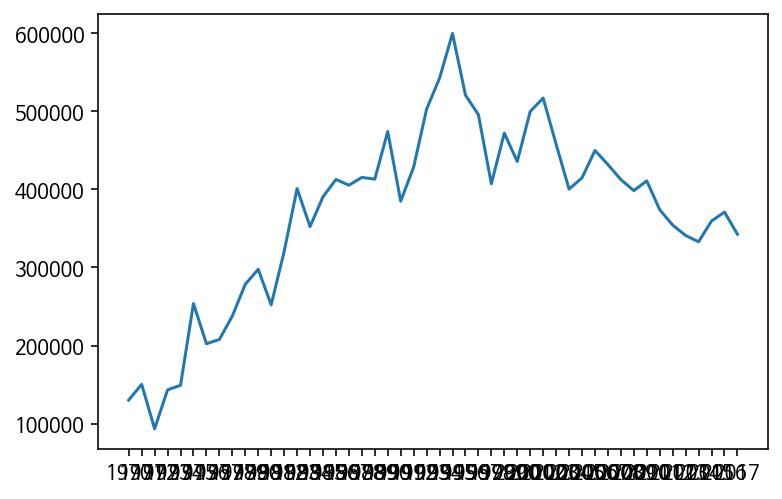

In [12]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

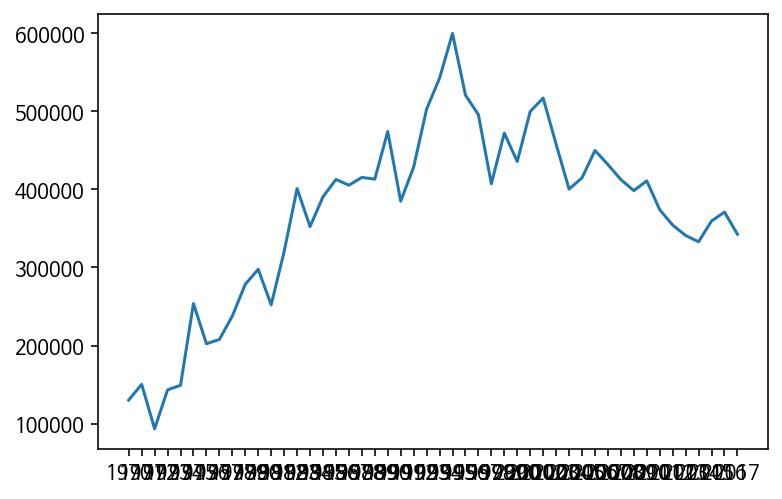

In [ ]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

###<예제 4-2> 차트 제목, 축 이름 추가


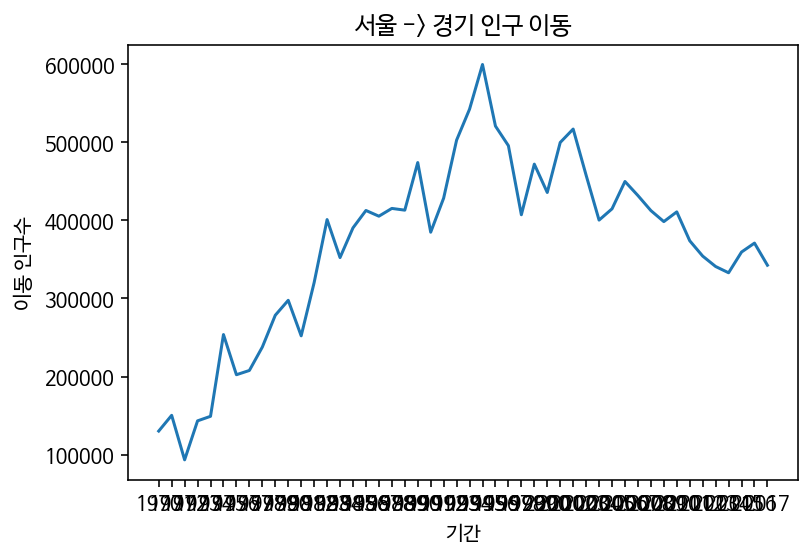

In [13]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 변경사항 저장하고 그래프 출력
plt.show()

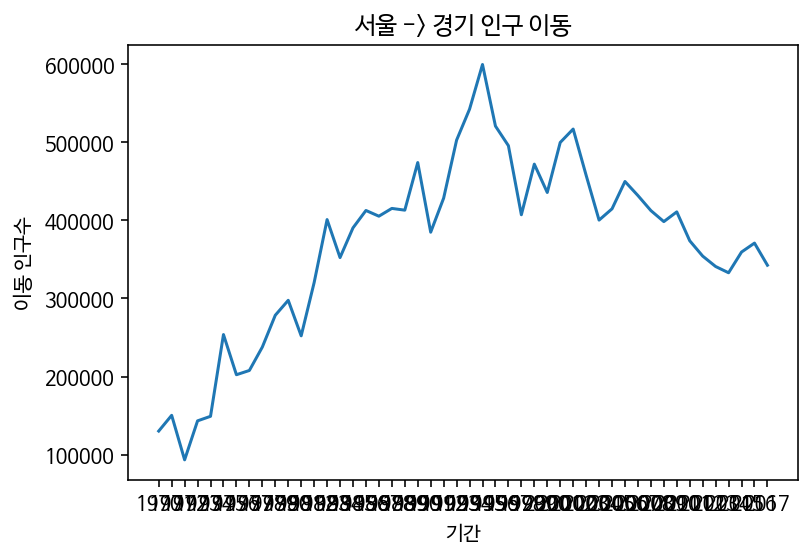

In [16]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('/content/drive/MyDrive/0_LG/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 변경사항 저장하고 그래프 출력
plt.show()

###<예제 4-4> 그래프 꾸미기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Unrecognized location 'beat'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


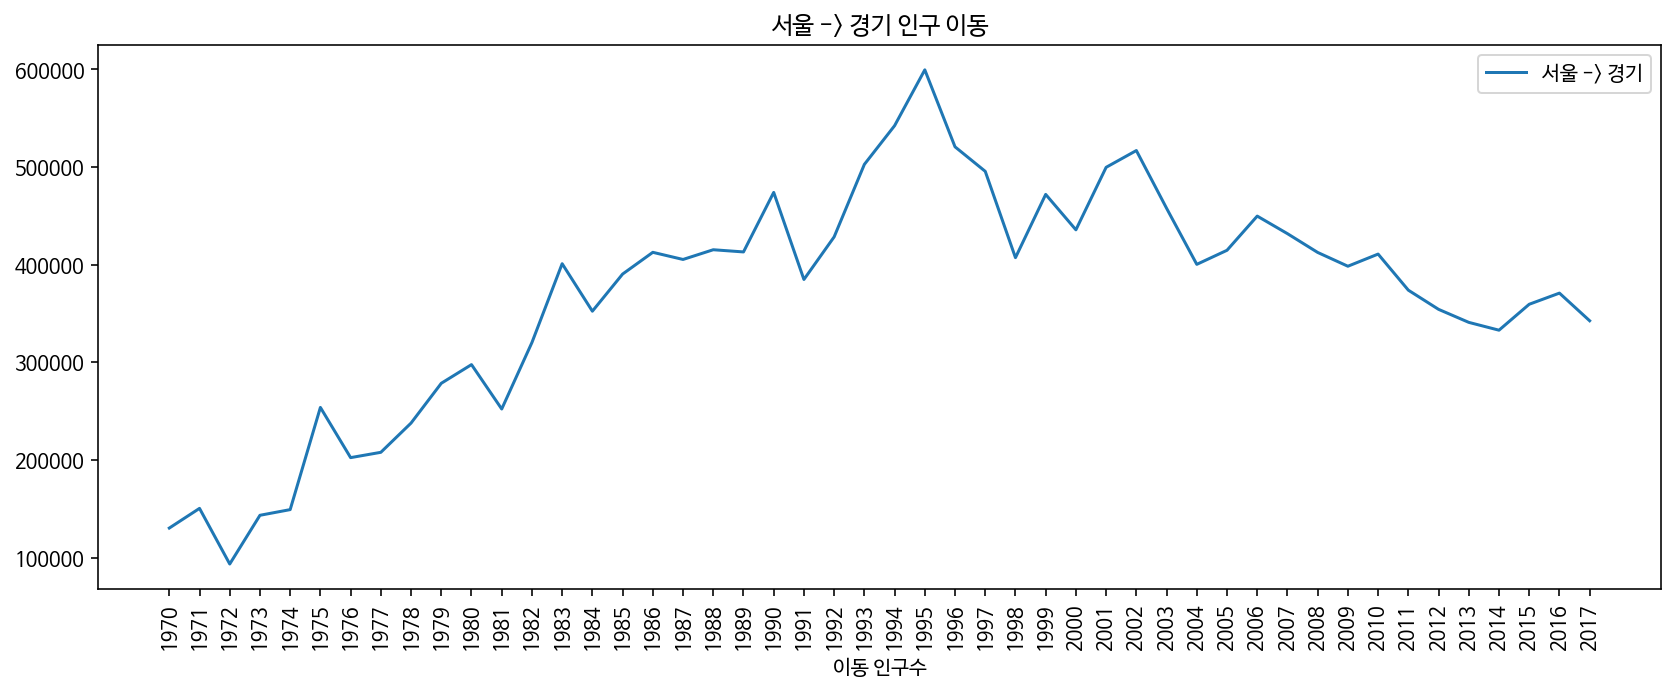

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation = 'vertical') # horizontal

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목
plt.title('서울 -> 경기 인구 이동')

# x축 이름
plt.xlabel('기간')

# y축 이름
plt.xlabel('이동 인구수')

# 범례 표시
plt.legend(labels=['서울 -> 경기'], loc='beat')

plt.show()

###<예제 4-5> 스타일 서식 지정 등

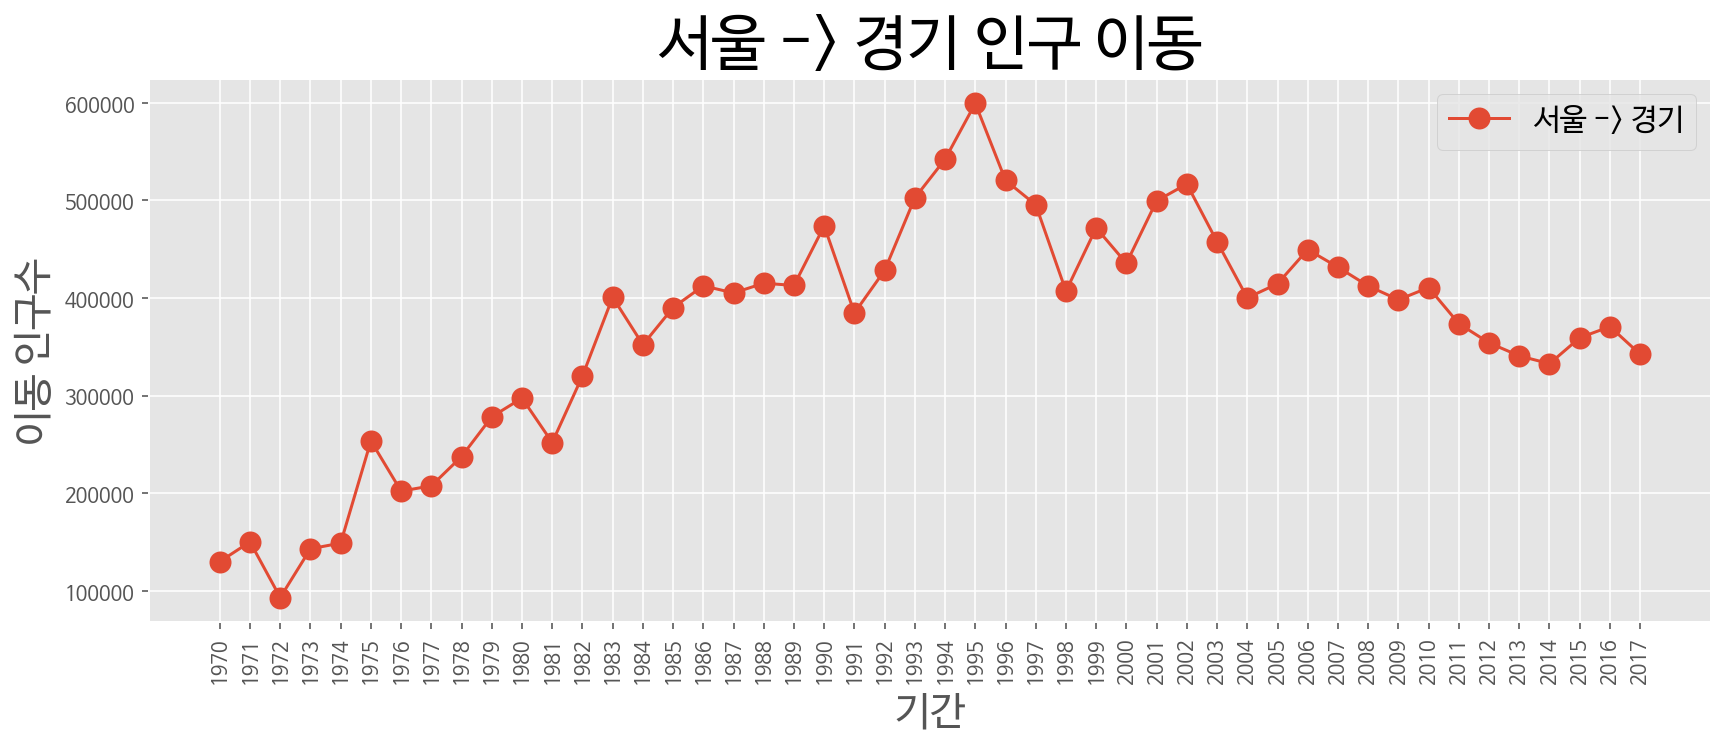

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size = 10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
# 마커 표시 추가
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

# 시트 제목
plt.title('서울 -> 경기 인구 이동', size=30)
# x축 이름
plt.xlabel('기간', size=20)
# y축 이름
plt.ylabel('이동 인구수', size=20)

# 범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

plt.show()

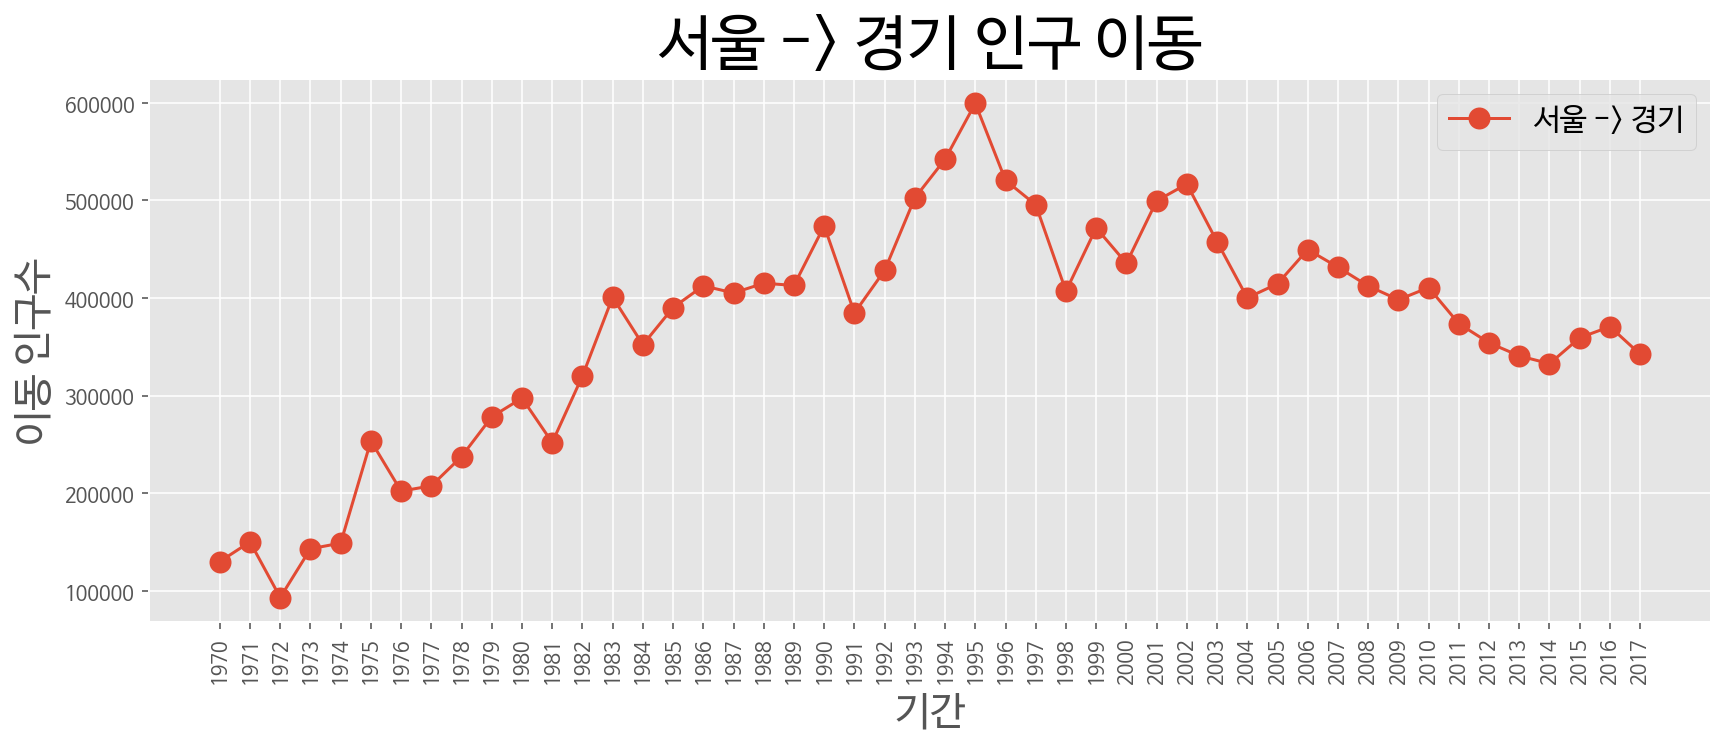

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
# print(sr_one)

# # 스타일 서식 지정
plt.style.use('ggplot')
# plt.show()

# # 그림 사이즈 지정
plt.figure(figsize=(14,5))
# plt.show()

# x축 눈금 라벨 회전하기
plt.xticks(size = 10, rotation='vertical')
# plt.show()

# x, y축 데이터를 plot 함수에 입력
# 마커 표시 추가
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)
# plt.show()

# 시트 제목
plt.title('서울 -> 경기 인구 이동', size=30)
# plt.show()

# x축 이름
plt.xlabel('기간', size=20)
# plt.show()

# y축 이름
plt.ylabel('이동 인구수', size=20)
# plt.show()

# # 범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
plt.show()

###<예제 4-6> 스타일 리스트 출력

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


###<예제 4-7> matplotlib 스타일 리스트 출력

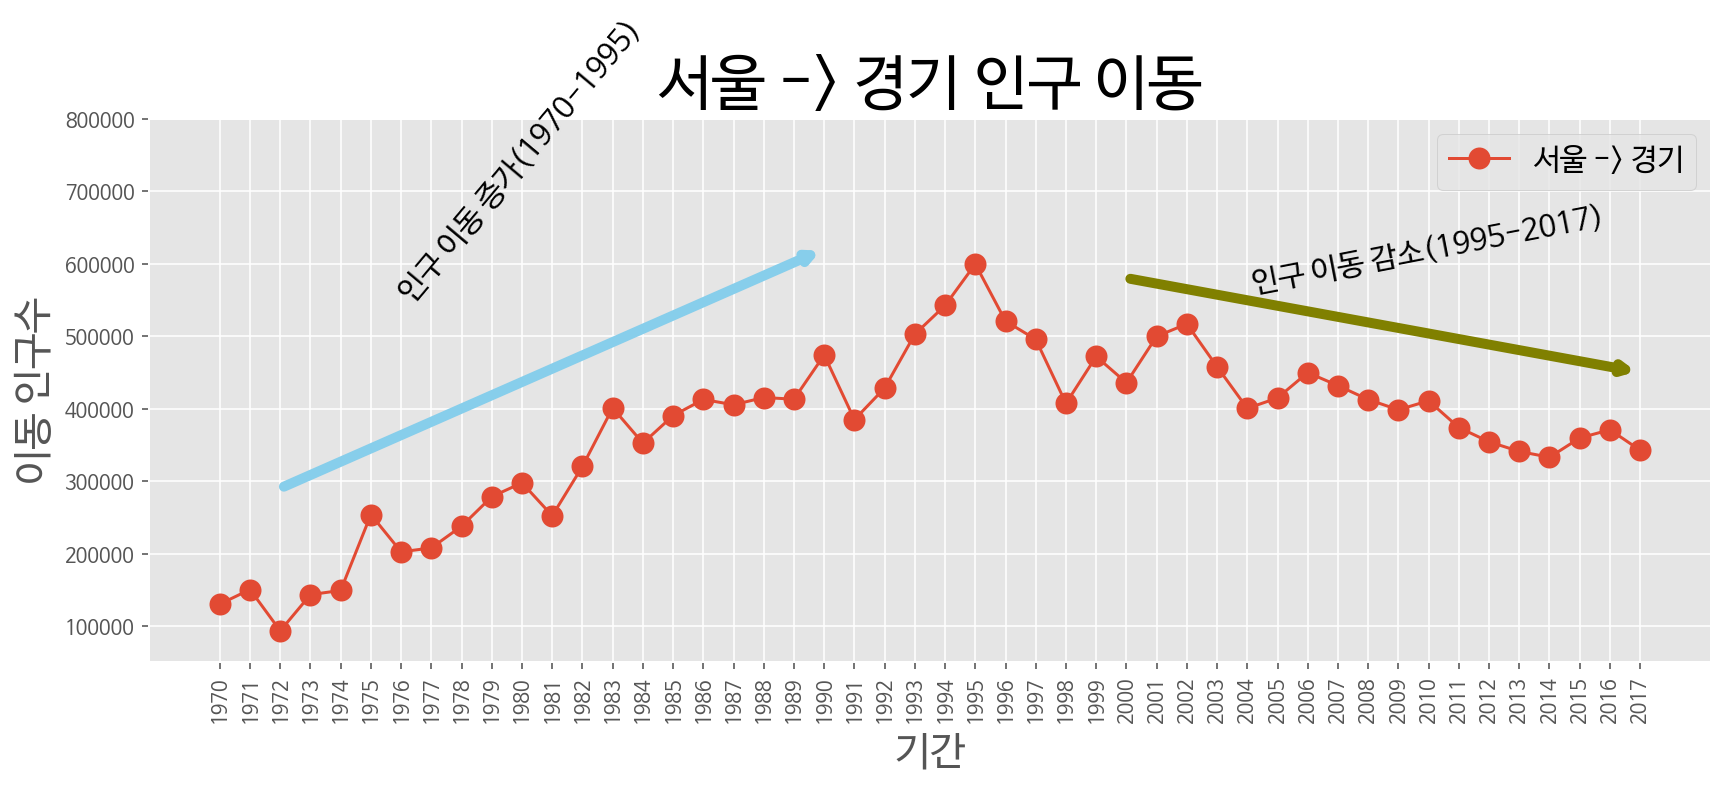

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size = 10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
# 마커 표시 추가
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

# 시트 제목
plt.title('서울 -> 경기 인구 이동', size=30)
# x축 이름
plt.xlabel('기간', size=20)
# y축 이름
plt.ylabel('이동 인구수', size=20)

# 범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy = (20, 620000),     # 화살표의 머리 부분(끝 점)
             xytext = (2, 290000),  # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',     # 좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), # 화살표 서식
             ) 
plt.annotate('',
             xy = (47, 450000),     # 화살표의 머리 부분(끝 점)
             xytext = (30, 580000),  # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',     # 좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5), # 화살표 서식
             ) 
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
             xy = (10, 550000),     # 텍스트 위치 기준점
             rotation = 10,         # 텍스트 회전 각도
             va = 'baseline',        # 텍스트 상하 정렬
             ha = 'center',          # 텍스트 좌우 정렬
             fontsize=15,           # 텍스트 크기
             ) 
plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
             xy = (40, 560000),     # 텍스트 위치 기준점
             rotation = 11,         # 텍스트 회전 각도
             va = 'baseline',        # 텍스트 상하 정렬
             ha = 'center',          # 텍스트 좌우 정렬
             fontsize=15,           # 텍스트 크기
             )
plt.show()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

###**<예제 4-11> 화면 4분할 그래프**



In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

**런타임 다시 시작**

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 코랩 전용, 파일 직접 업로드하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/0_Python_Pandas/part4

/content/drive/MyDrive/0_Python_Pandas/part4


     전출지별     전입지별      1970      1971  ...      2014      2015      2016      2017
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1      전국       전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2     NaN    서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3     NaN    부산광역시    448577    389797  ...    485710    507031    459015    439073
4     NaN    대구광역시         -         -  ...    350213    351424    328228    321182
..    ...      ...       ...       ...  ...       ...       ...       ...       ...
320   NaN     전라북도       139       202  ...       609       683       733       768
321   NaN     전라남도       631       965  ...       928      1062      1127      1102
322   NaN     경상북도       374       619  ...       728       903       931       994
323   NaN     경상남도       474       479  ...      1223      1500      1448      1501
324   NaN  제주특별자치도      9290     12427  ...     59673     59036     66444   

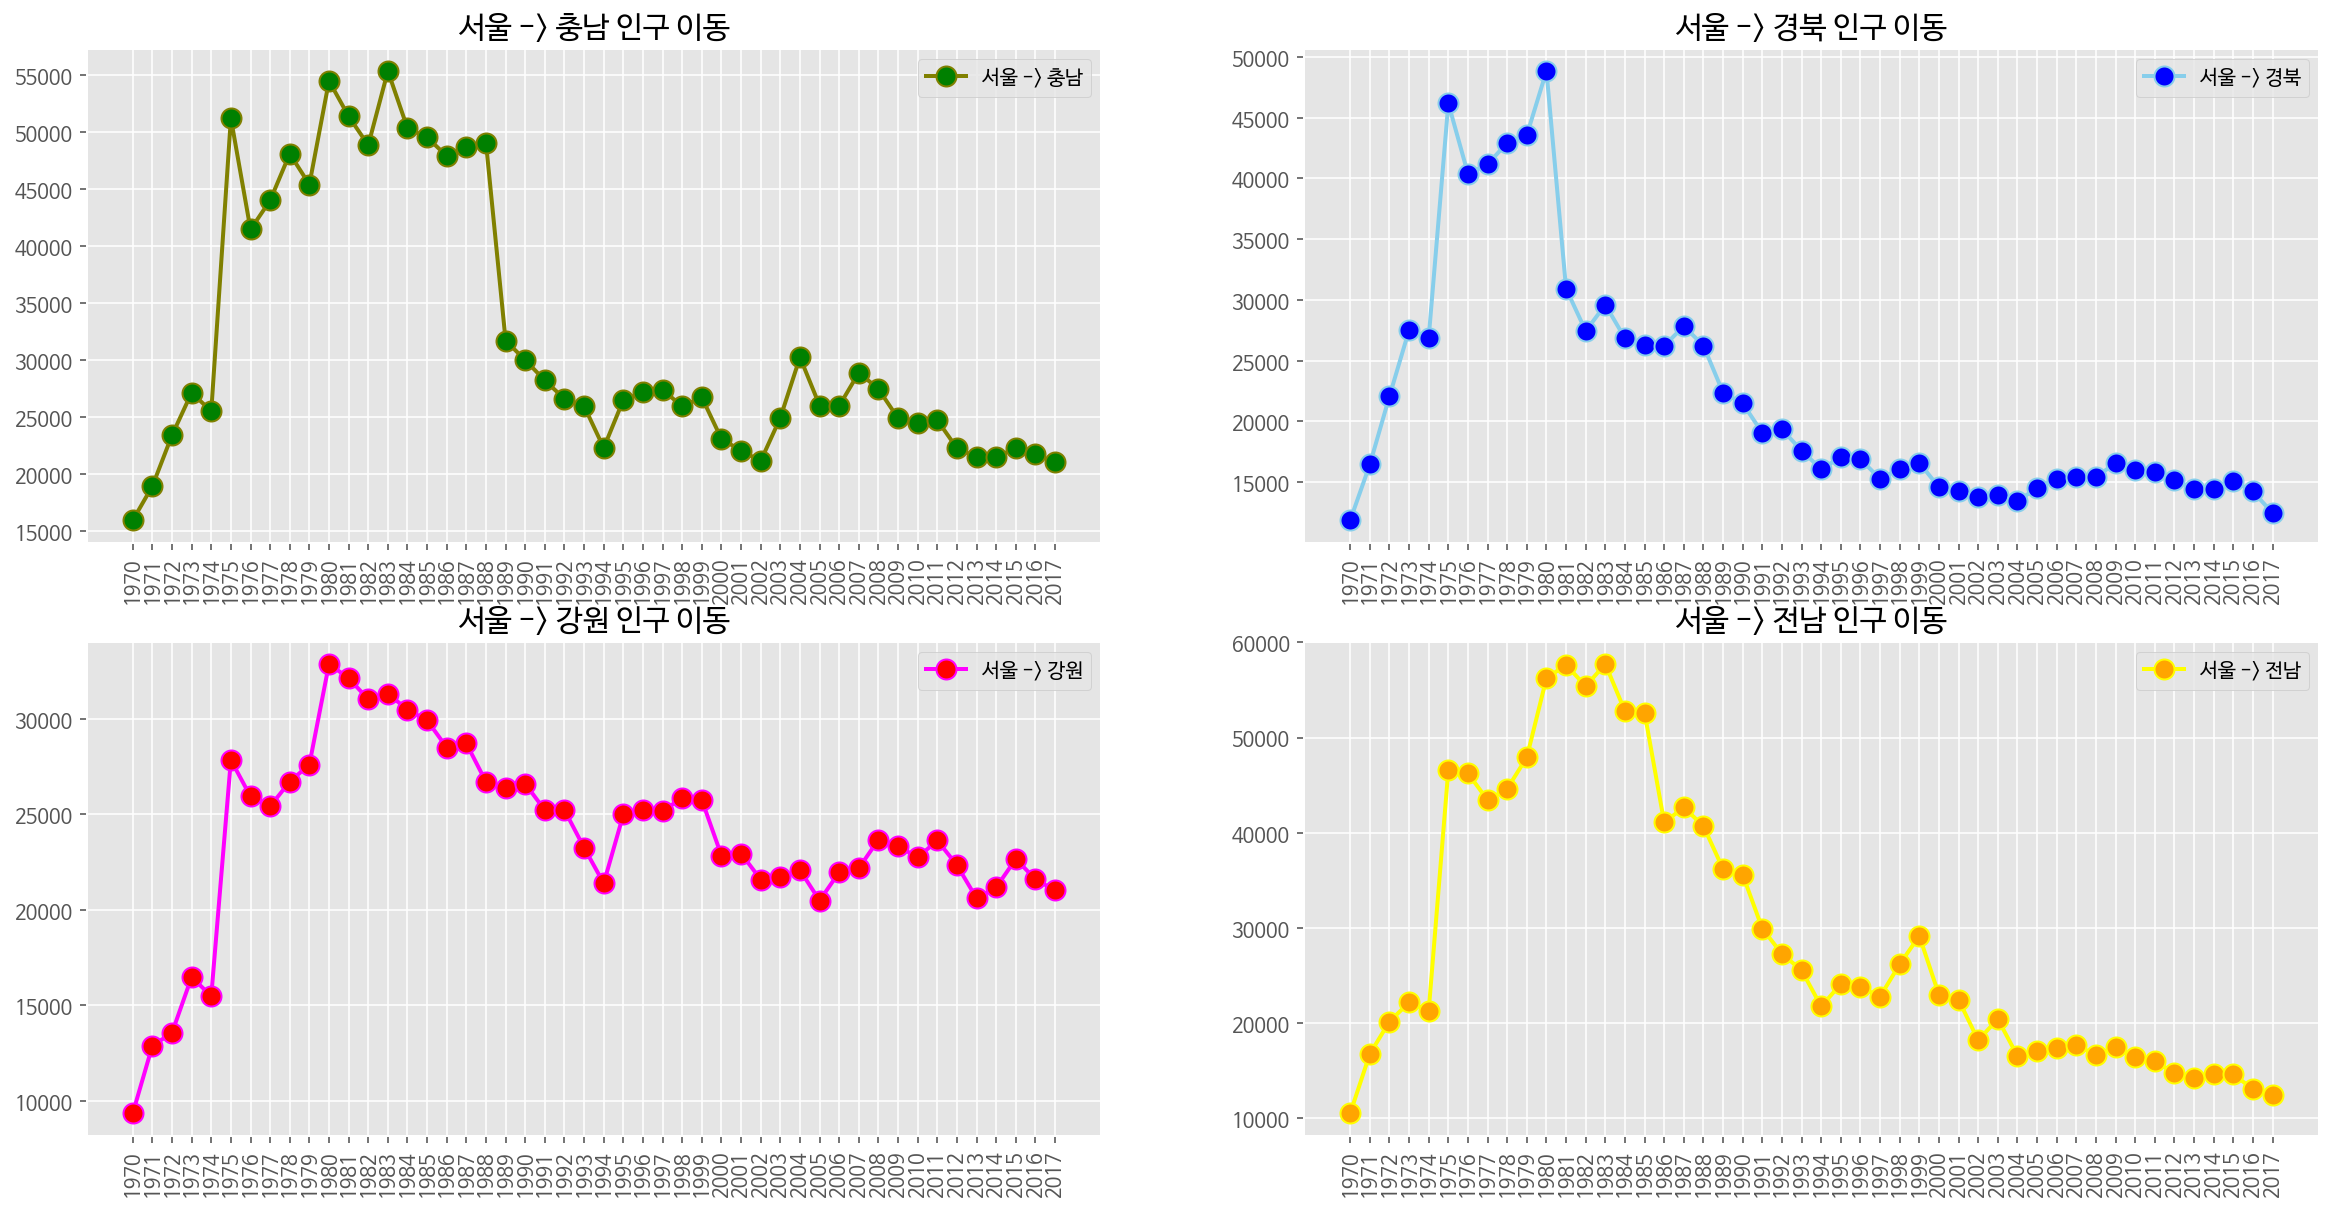

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
# df = pd.read_excel('./시도별 전출입 인구수.xlsx', fillna = 0, header=0)
df = pd.read_excel('./시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
print(df)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', 
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()  # 변경사항 저장하고 그래프 출력

###**<예제 4-13> 면적 그래프(stacked=False) 그리기**



In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

**런타임 다시 시작**

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 코랩 전용, 파일 직접 업로드하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/0_Python_Pandas/part4

/content/drive/MyDrive/0_Python_Pandas/part4


     전출지별     전입지별      1970      1971  ...      2014      2015      2016      2017
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1      전국       전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2     NaN    서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3     NaN    부산광역시    448577    389797  ...    485710    507031    459015    439073
4     NaN    대구광역시         -         -  ...    350213    351424    328228    321182
..    ...      ...       ...       ...  ...       ...       ...       ...       ...
320   NaN     전라북도       139       202  ...       609       683       733       768
321   NaN     전라남도       631       965  ...       928      1062      1127      1102
322   NaN     경상북도       374       619  ...       728       903       931       994
323   NaN     경상남도       474       479  ...      1223      1500      1448      1501
324   NaN  제주특별자치도      9290     12427  ...     59673     59036     66444   

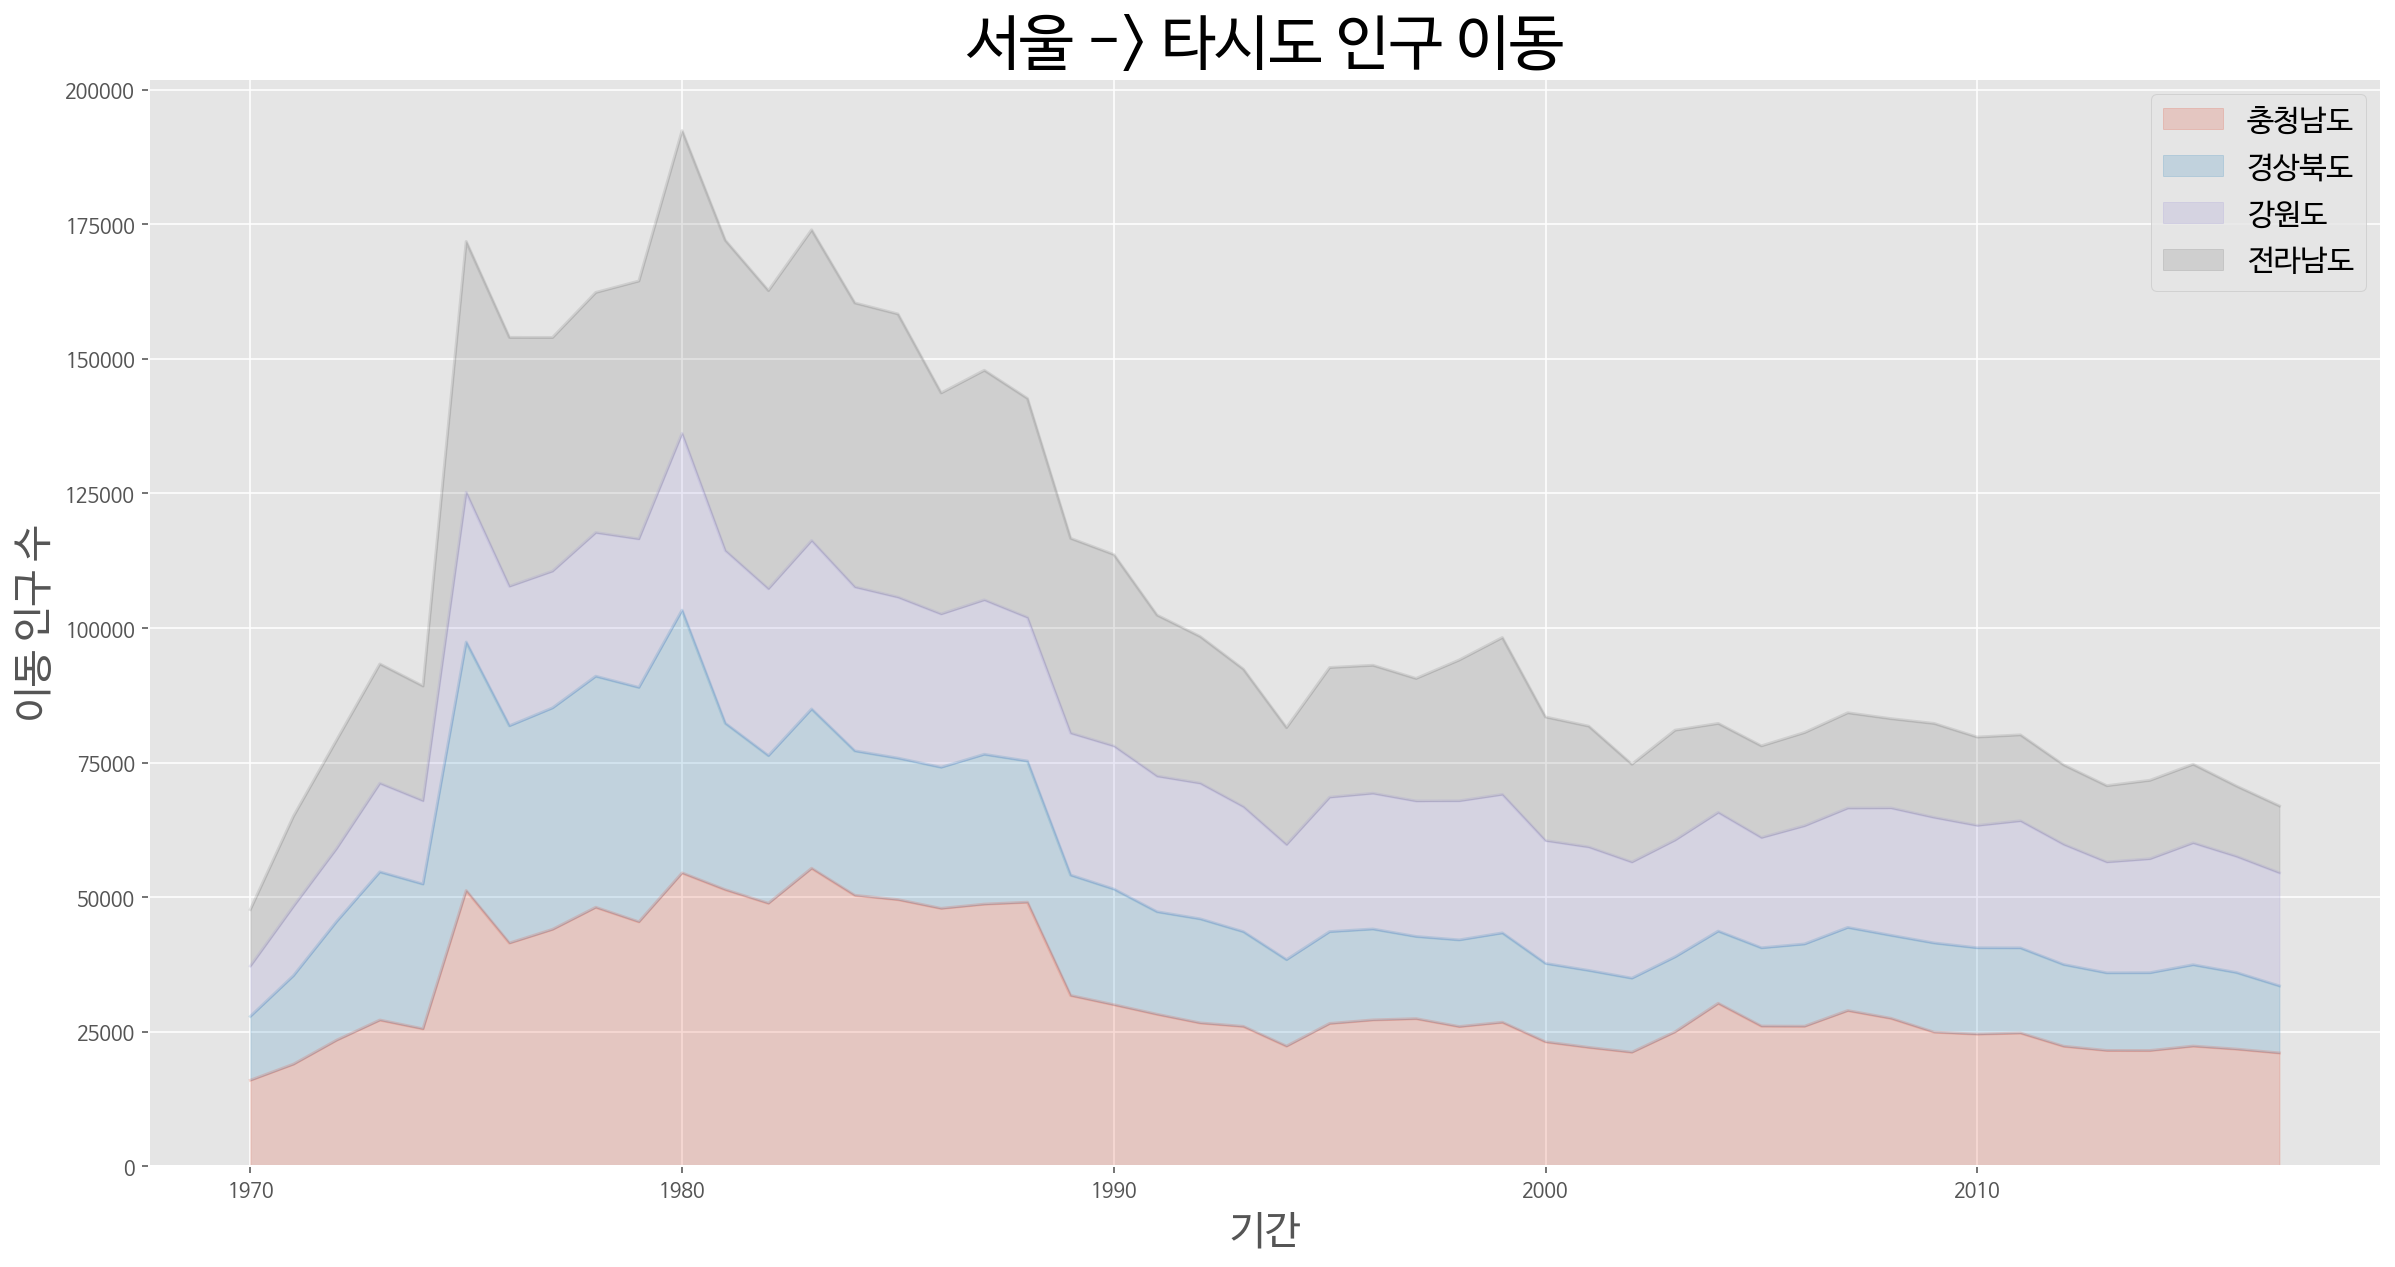

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
# df = pd.read_excel('./시도별 전출입 인구수.xlsx', fillna = 0, header=0)
df = pd.read_excel('./시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
print(df)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

     전출지별     전입지별      1970      1971  ...      2014      2015      2016      2017
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1      전국       전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2     NaN    서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3     NaN    부산광역시    448577    389797  ...    485710    507031    459015    439073
4     NaN    대구광역시         -         -  ...    350213    351424    328228    321182
..    ...      ...       ...       ...  ...       ...       ...       ...       ...
320   NaN     전라북도       139       202  ...       609       683       733       768
321   NaN     전라남도       631       965  ...       928      1062      1127      1102
322   NaN     경상북도       374       619  ...       728       903       931       994
323   NaN     경상남도       474       479  ...      1223      1500      1448      1501
324   NaN  제주특별자치도      9290     12427  ...     59673     59036     66444   

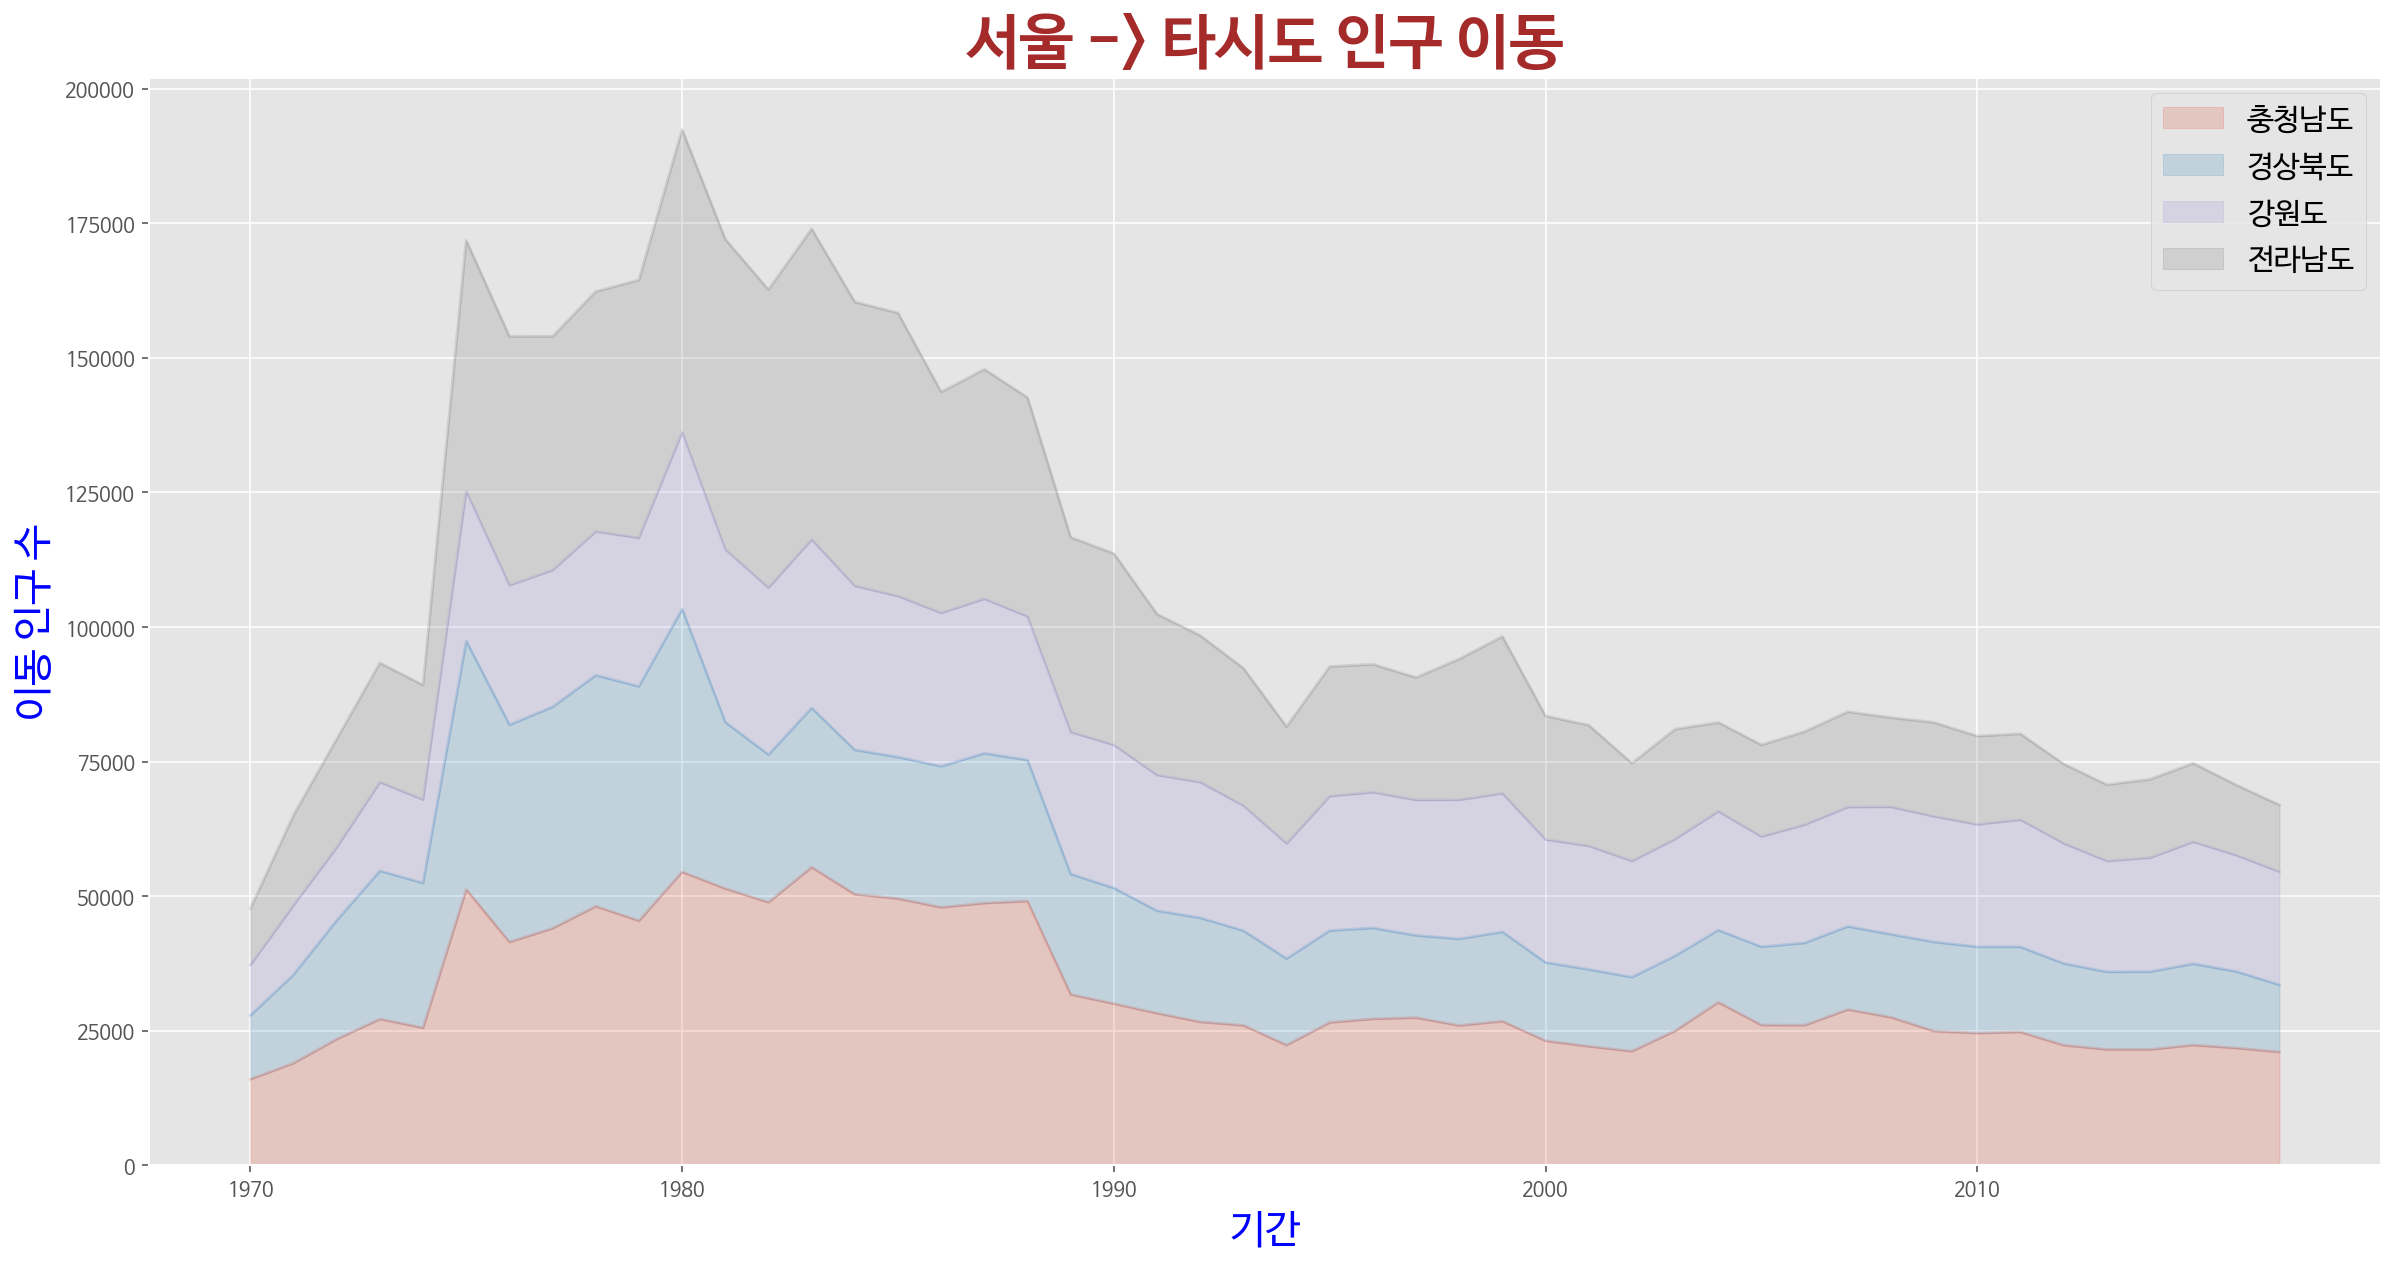

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
# df = pd.read_excel('./시도별 전출입 인구수.xlsx', fillna = 0, header=0)
df = pd.read_excel('./시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
print(df)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

###**<예제 4-16> 세로형 막대 그래프**



In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

**런타임 다시 시작**

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 코랩 전용, 파일 직접 업로드하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/0_Python_Pandas/part4

/content/drive/MyDrive/0_Python_Pandas/part4


     전출지별     전입지별      1970      1971  ...      2014      2015      2016      2017
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1      전국       전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2     NaN    서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3     NaN    부산광역시    448577    389797  ...    485710    507031    459015    439073
4     NaN    대구광역시         -         -  ...    350213    351424    328228    321182
..    ...      ...       ...       ...  ...       ...       ...       ...       ...
320   NaN     전라북도       139       202  ...       609       683       733       768
321   NaN     전라남도       631       965  ...       928      1062      1127      1102
322   NaN     경상북도       374       619  ...       728       903       931       994
323   NaN     경상남도       474       479  ...      1223      1500      1448      1501
324   NaN  제주특별자치도      9290     12427  ...     59673     59036     66444   

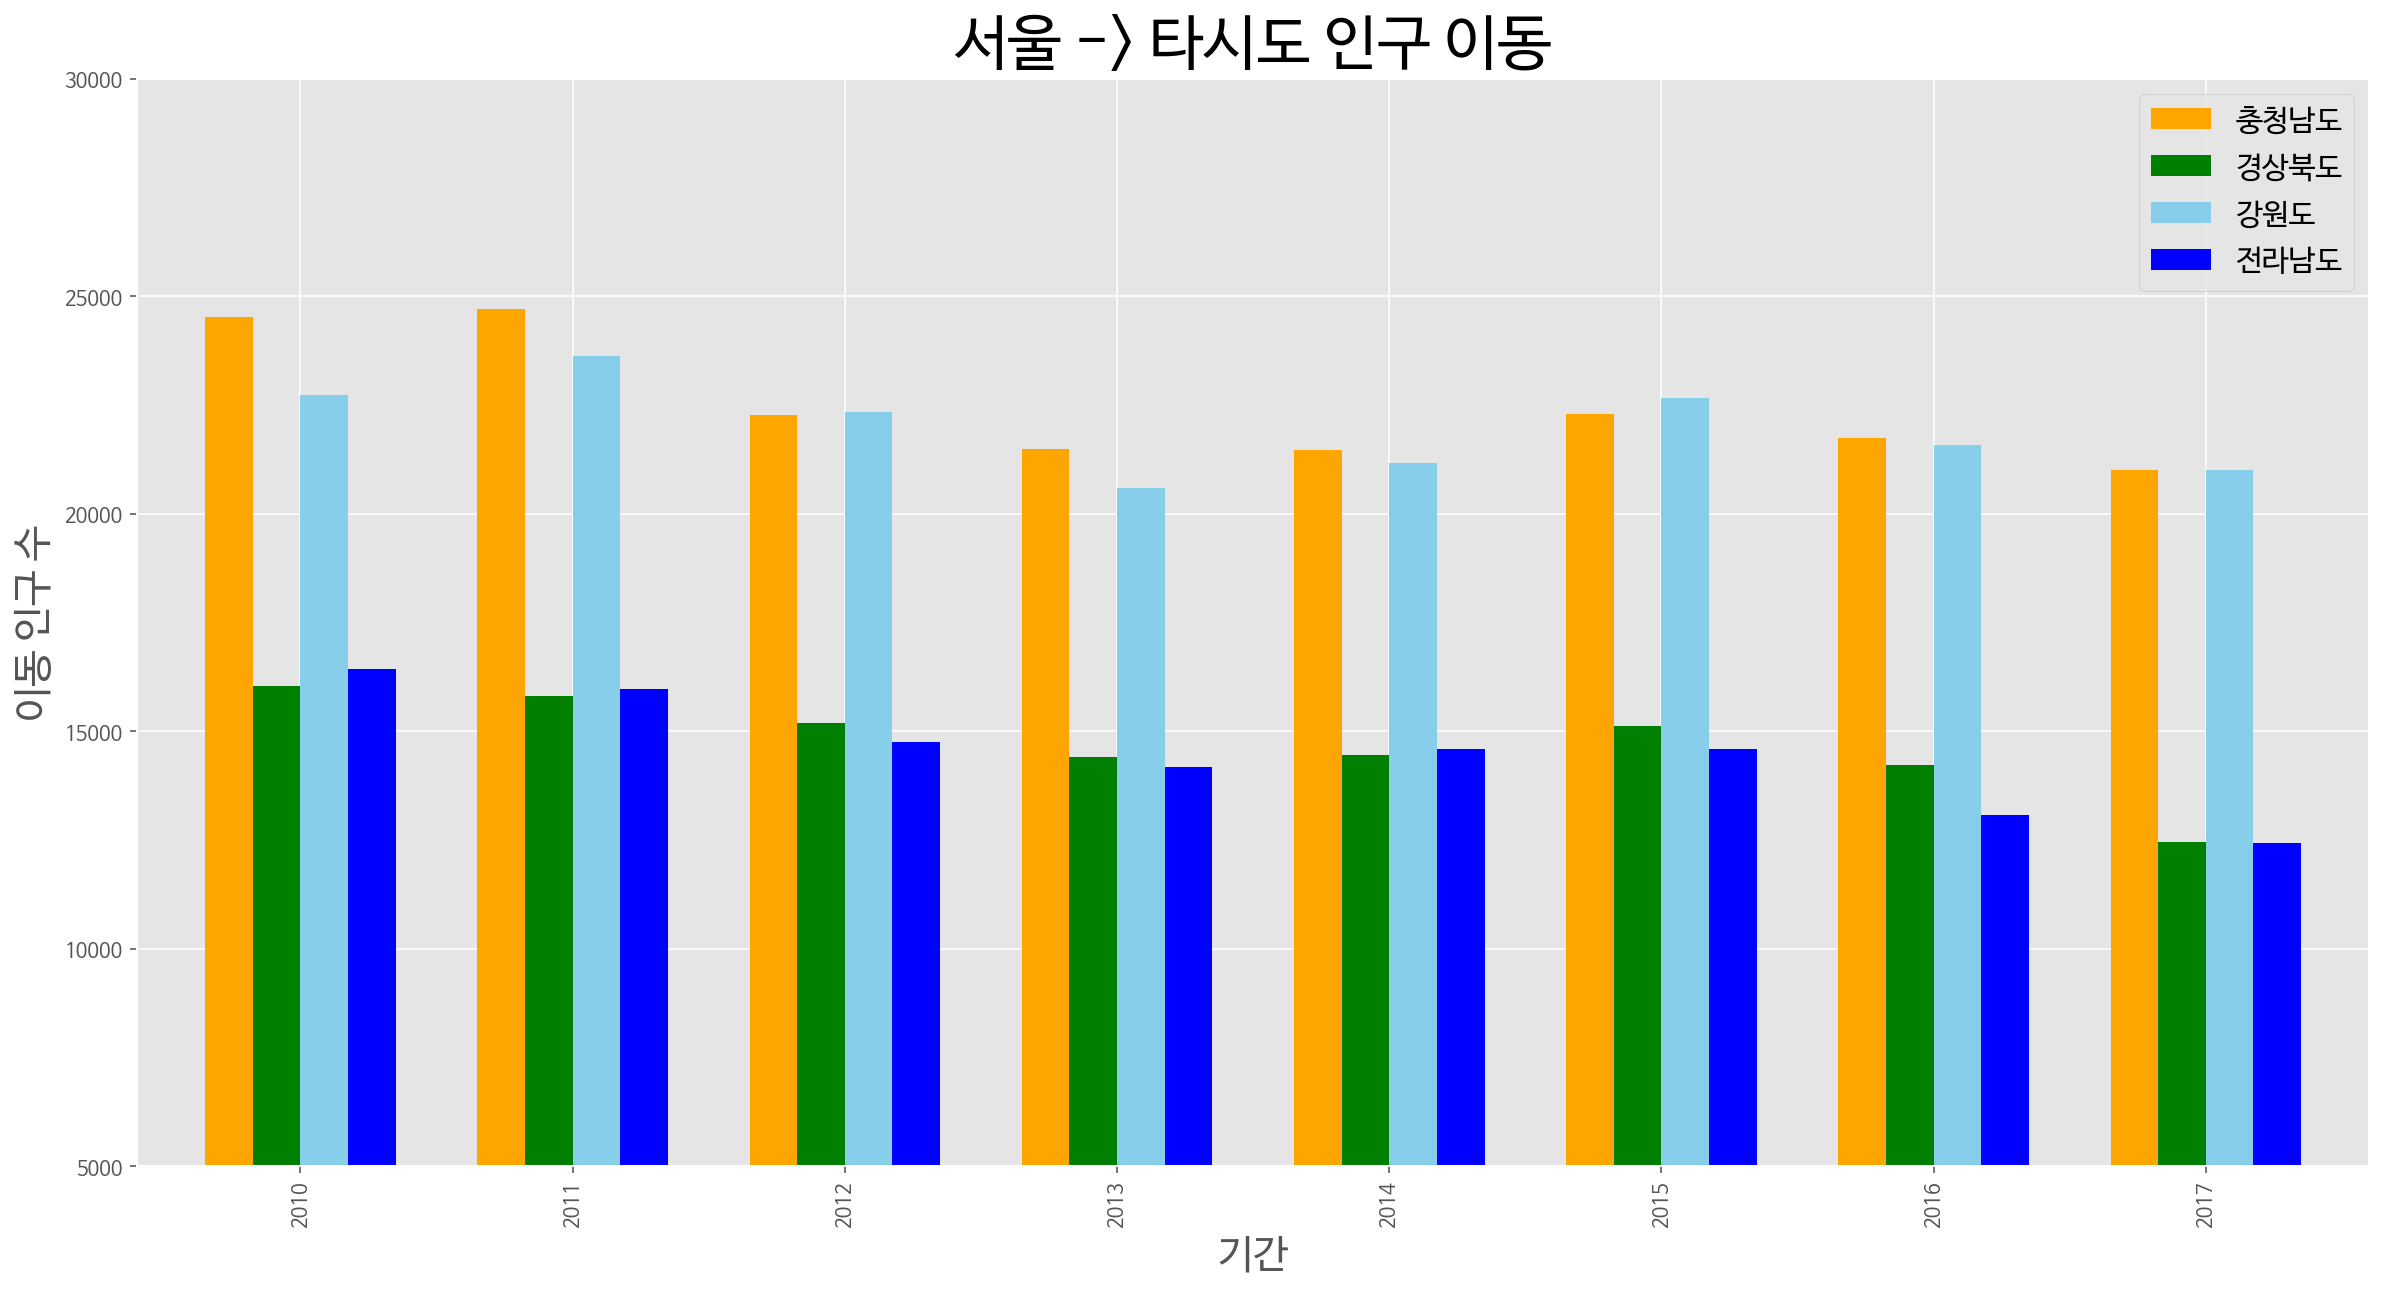

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
# df = pd.read_excel('./시도별 전출입 인구수.xlsx', fillna = 0, header=0)
df = pd.read_excel('./시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
print(df)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7, 
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000,30000)
plt.legend(loc='best', fontsize=15)

plt.show()

     전출지별     전입지별      1970      1971  ...      2014      2015      2016      2017
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1      전국       전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2     NaN    서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3     NaN    부산광역시    448577    389797  ...    485710    507031    459015    439073
4     NaN    대구광역시         -         -  ...    350213    351424    328228    321182
..    ...      ...       ...       ...  ...       ...       ...       ...       ...
320   NaN     전라북도       139       202  ...       609       683       733       768
321   NaN     전라남도       631       965  ...       928      1062      1127      1102
322   NaN     경상북도       374       619  ...       728       903       931       994
323   NaN     경상남도       474       479  ...      1223      1500      1448      1501
324   NaN  제주특별자치도      9290     12427  ...     59673     59036     66444   

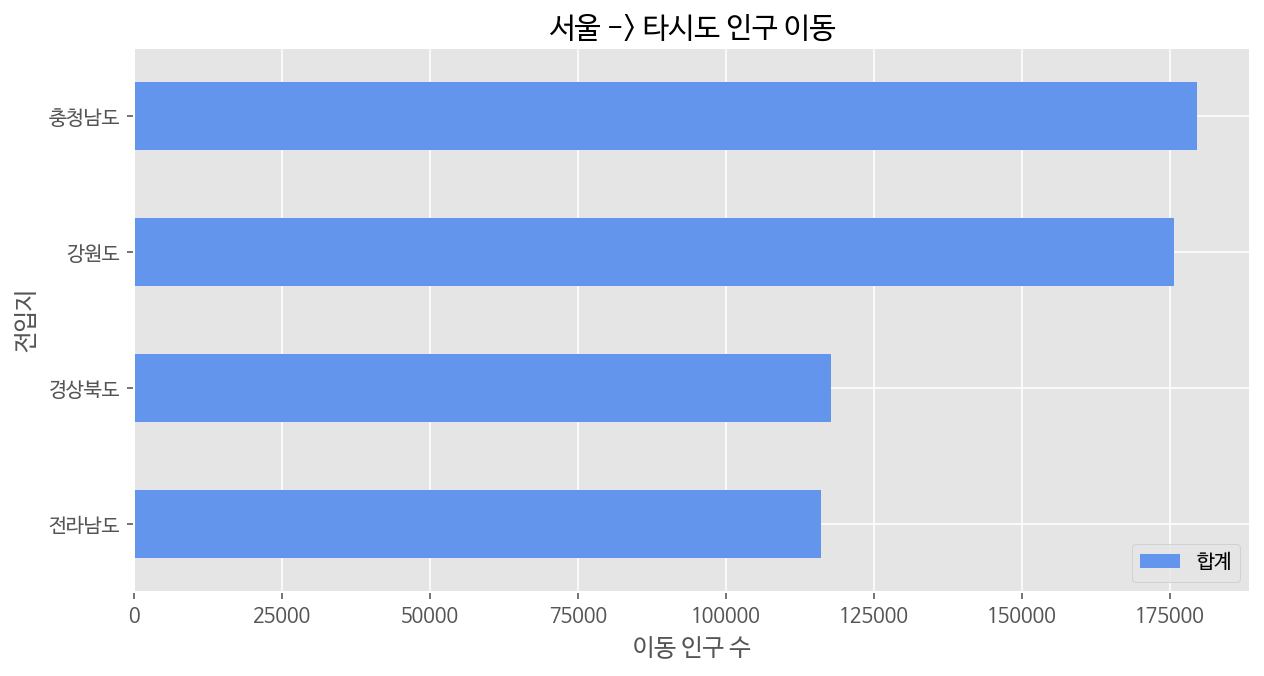

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
# df = pd.read_excel('./시도별 전출입 인구수.xlsx', fillna = 0, header=0)
df = pd.read_excel('./시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
print(df)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot') 

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

###**<예제 4-18> 2축 그래프 그리기**



In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

**런타임 다시 시작**

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 코랩 전용, 파일 직접 업로드하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/0_Python_Pandas/part4

/content/drive/MyDrive/0_Python_Pandas/part4


In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('ggplot')

# 마이너스 부호 출력 설정
plt.rcParams['axes.unicode_minus'] = False

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T
print(df)

발전 전력별   합계   수력   화력 원자력
1990    277  156  121   -
1991    263  150  113   -
1992    247  142  105   -
1993    221  133   88   -
1994    231  138   93   -
1995    230  142   88   -
1996    213  125   88   -
1997    193  107   86   -
1998    170  102   68   -
1999    186  103   83   -
2000    194  102   92   -
2001    202  106   96   -
2002    190  106   84   -
2003    196  117   79   -
2004    206  125   81   -
2005    215  131   84   -
2006    225  126   99   -
2007    236  133  103   -
2008    255  141  114   -
2009    235  125  110   -
2010    237  134  103   -
2011    211  132   79   -
2012    215  135   80   -
2013    221  139   82   -
2014    216  130   86   -
2015    190  100   90   -
2016    239  128  111   -


In [ ]:
# 증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량-1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량']/df['총발전량-1년'])- 1) * 100
print(df)

발전 전력별 총발전량   수력   화력 원자력 총발전량-1년       증감률       증감율
1990    277  156  121   -     NaN       NaN       NaN
1991    263  150  113   -     277  -5.05415  -5.05415
1992    247  142  105   -     263  -6.08365  -6.08365
1993    221  133   88   -     247  -10.5263  -10.5263
1994    231  138   93   -     221   4.52489   4.52489
1995    230  142   88   -     231   -0.4329   -0.4329
1996    213  125   88   -     230   -7.3913   -7.3913
1997    193  107   86   -     213  -9.38967  -9.38967
1998    170  102   68   -     193  -11.9171  -11.9171
1999    186  103   83   -     170   9.41176   9.41176
2000    194  102   92   -     186   4.30108   4.30108
2001    202  106   96   -     194   4.12371   4.12371
2002    190  106   84   -     202  -5.94059  -5.94059
2003    196  117   79   -     190   3.15789   3.15789
2004    206  125   81   -     196   5.10204   5.10204
2005    215  131   84   -     206   4.36893   4.36893
2006    225  126   99   -     215   4.65116   4.65116
2007    236  133  103   -   

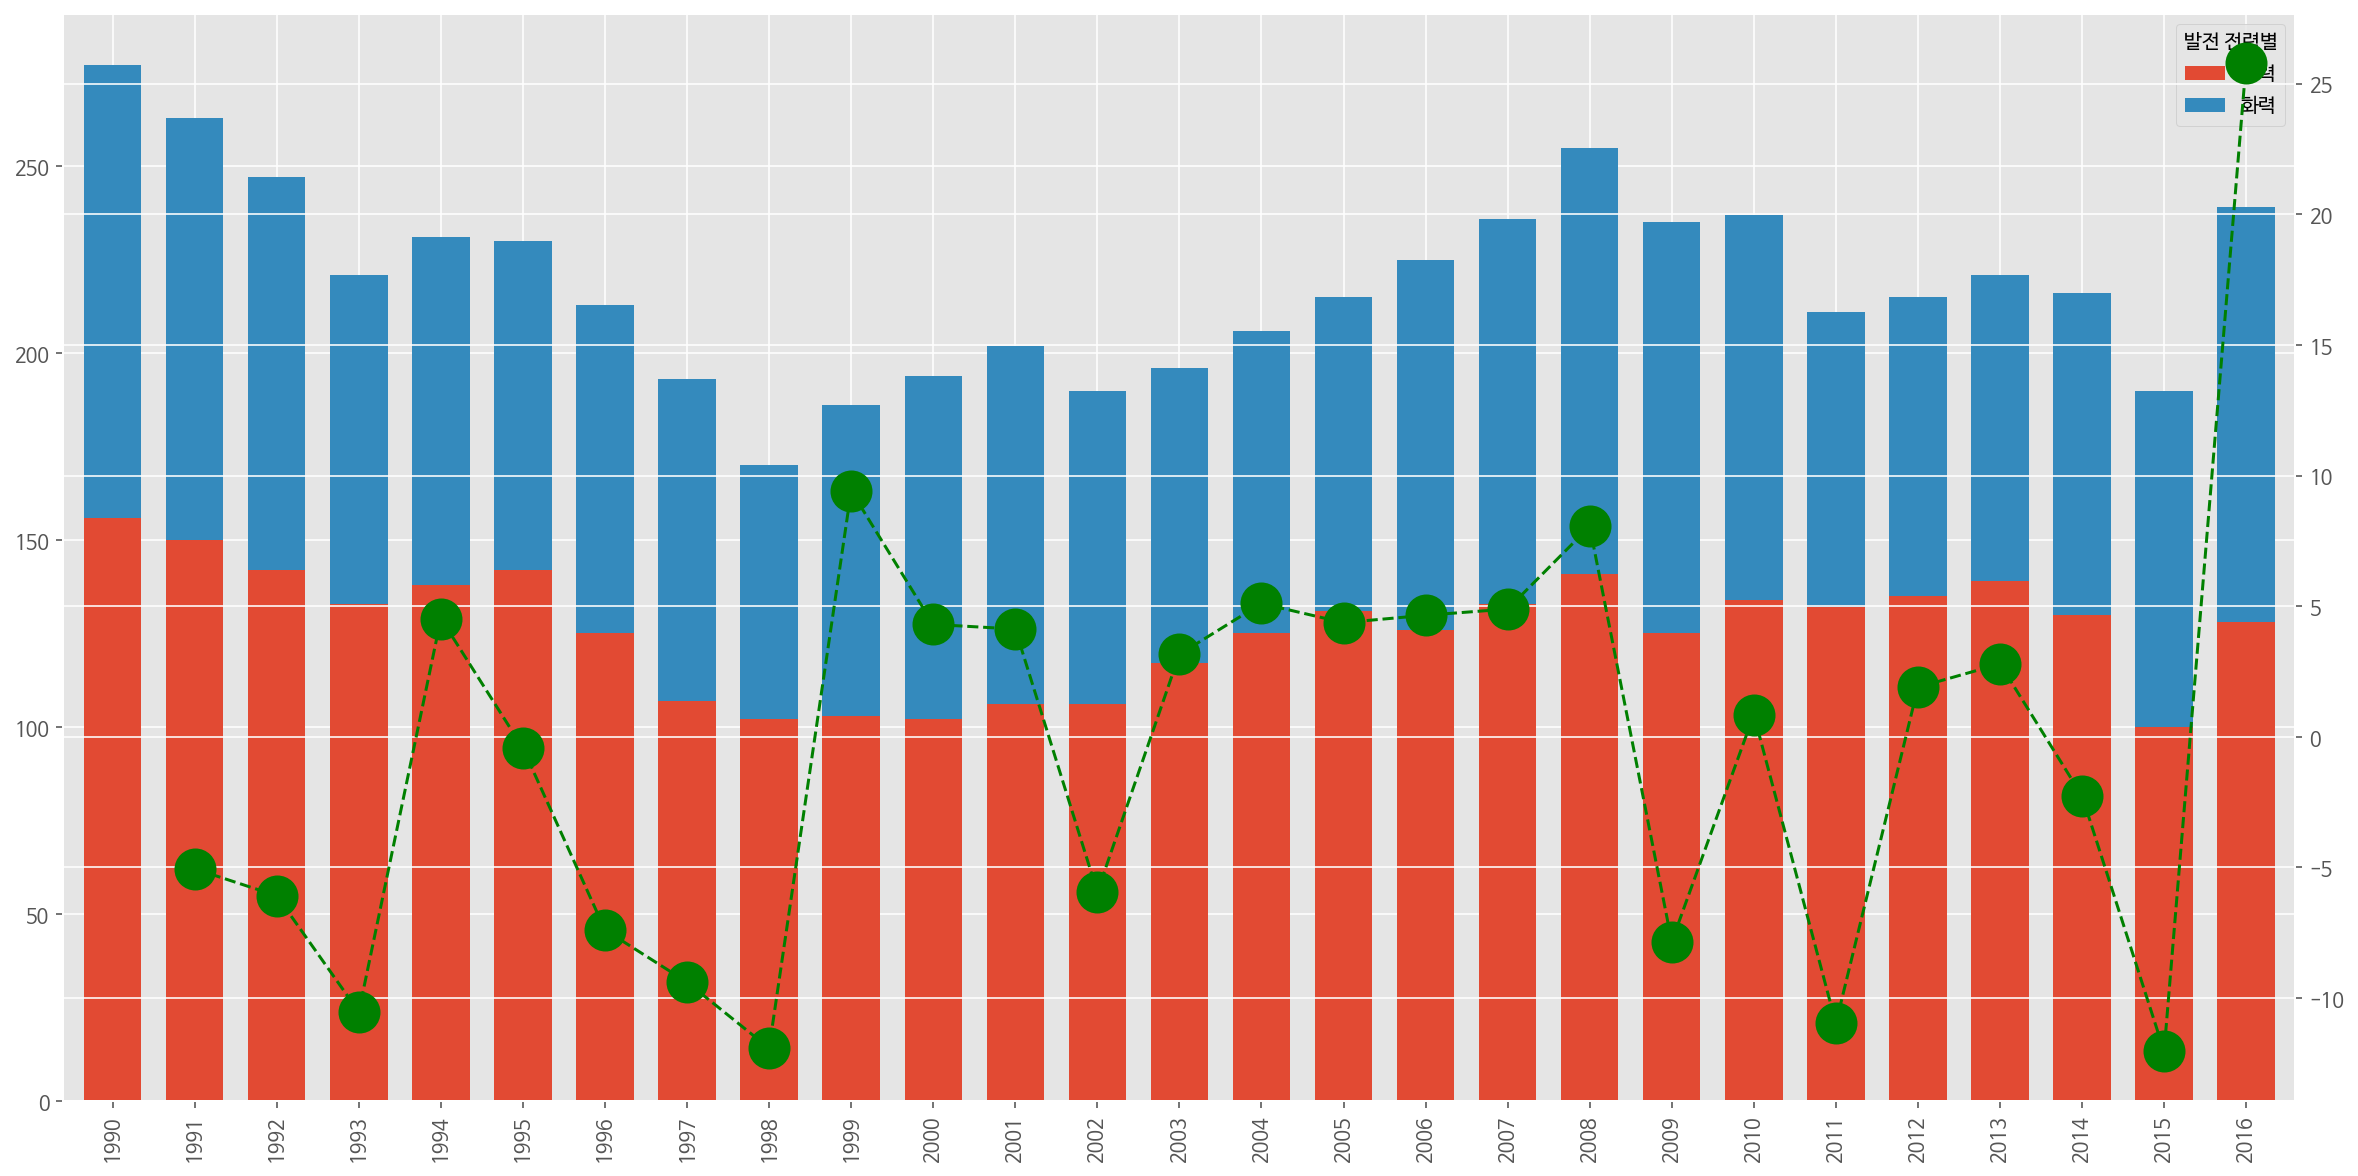

In [ ]:
# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

In [ ]:
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

(-50.0, 50.0)

In [ ]:
ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

Text(2352.4, 0.5, '전년 대비 증감율(%)')

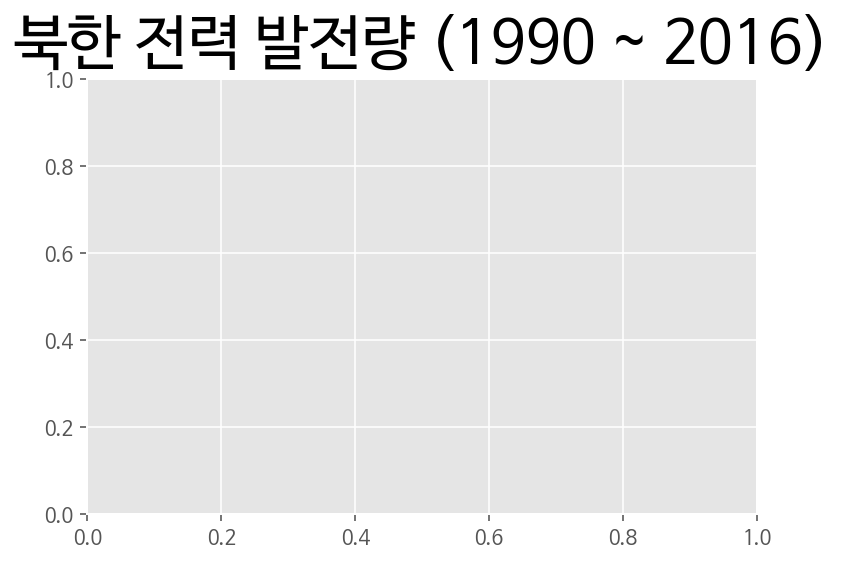

In [ ]:
plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

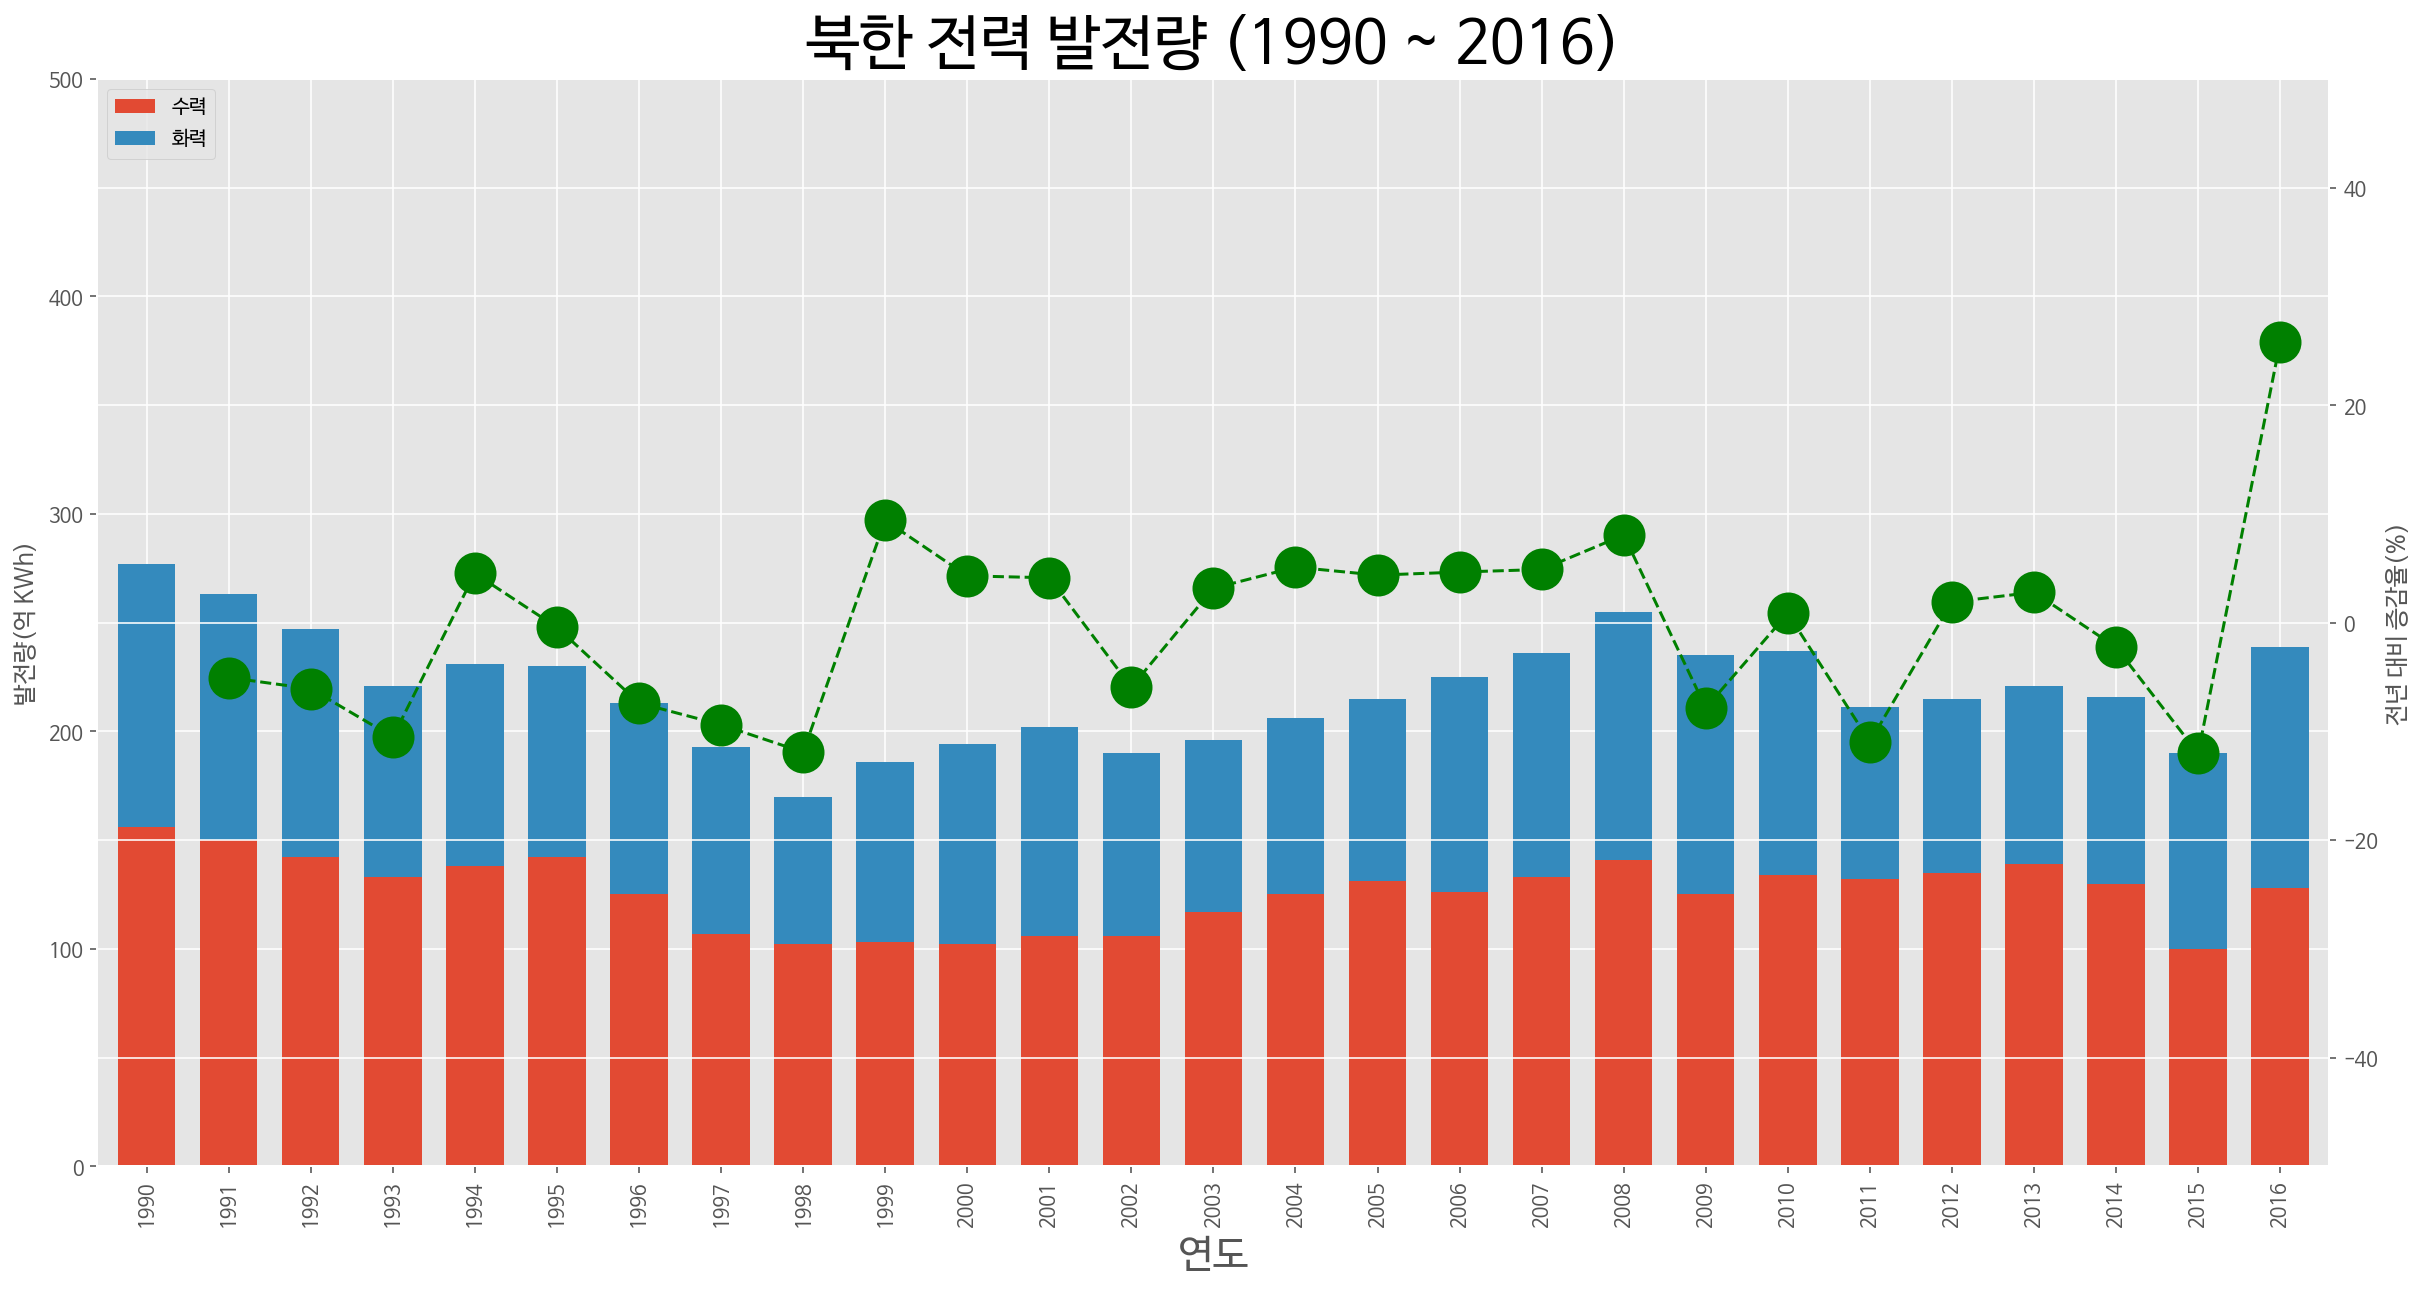

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('ggplot')

# 마이너스 부호 출력 설정
plt.rcParams['axes.unicode_minus'] = False

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T
  
# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

###**<예제 4-19> 히스토그램**

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')   # 스타일 서식 지정

In [ ]:
# 코랩 전용, 파일 직접 업로드하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/0_Python_Pandas/part4

/content/drive/MyDrive/0_Python_Pandas/part4


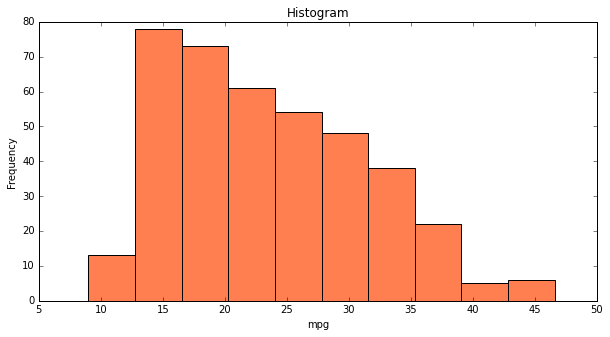

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

### **예제 4-20 산점도**

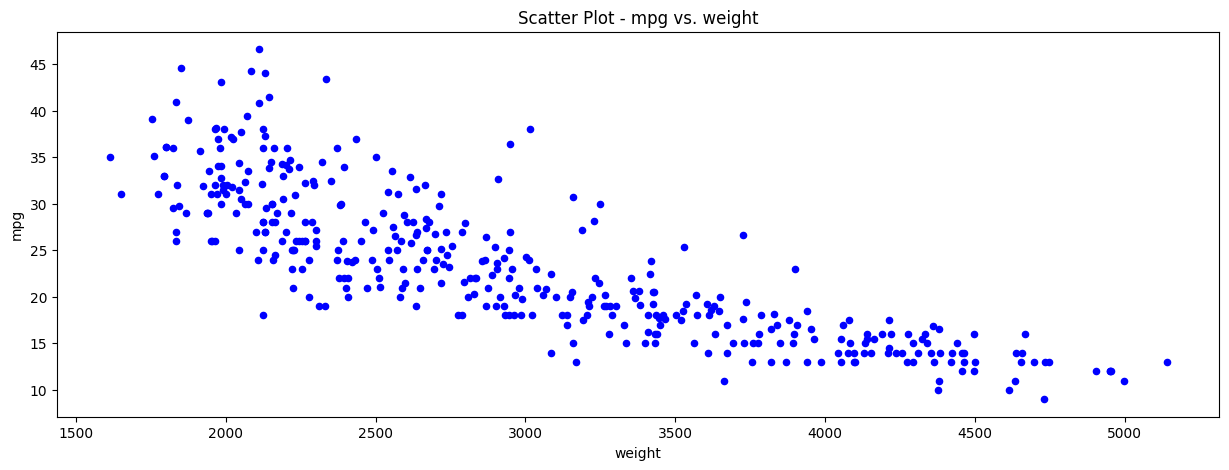

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='blue', s=20, figsize=(15, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

### **예제 4-21 버블차트**

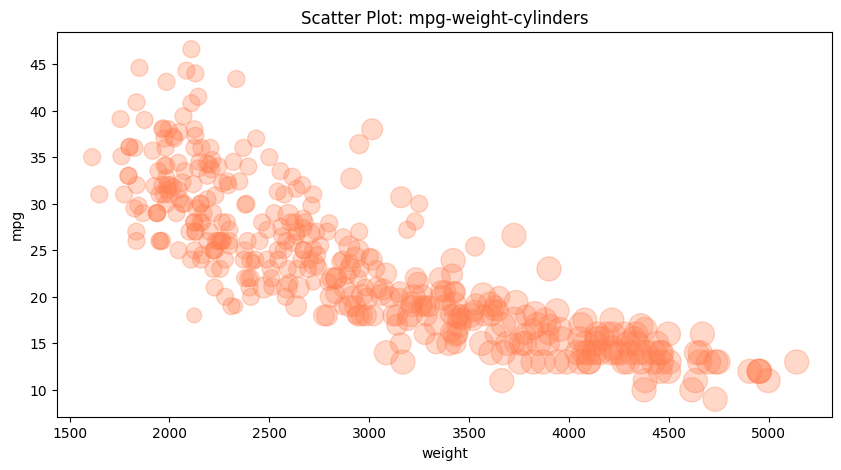

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

### **4-22 그림파일로 저장**

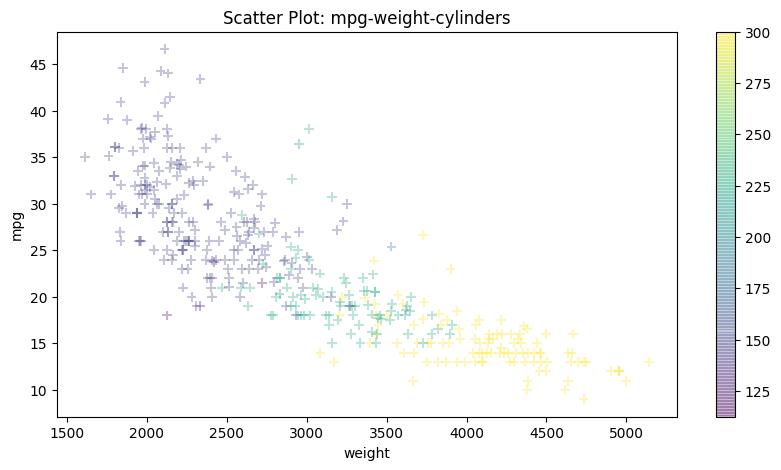

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()

### **예제 4-23 파이 차트**

           mpg  cylinders  displacement  ...  acceleration  model year  count
origin                                   ...                                 
1       5000.8       1556       61229.5  ...        3743.4       18827    249
2       1952.4        291        7640.0  ...        1175.1        5307     70
3       2405.6        324        8114.0  ...        1277.6        6118     79

[3 rows x 7 columns]


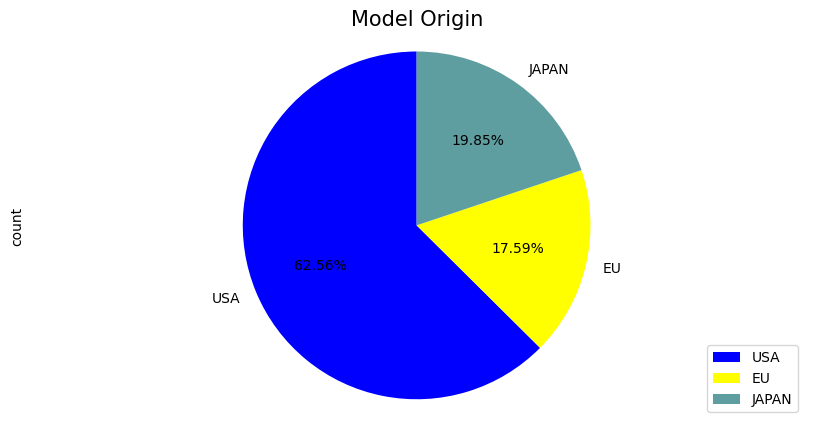

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

plt.style.use('default')   # 스타일 서식 지정

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(10, 5),
                     autopct='%1.2f%%',   # 퍼센트 % 표시
                     startangle=90,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['blue', 'yellow', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=15)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='lower right')   # 범례 표시
plt.show()

### **예제 4-24 박스 플롯**

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

**런타임 다시 시작**

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 코랩 전용, 파일 직접 업로드하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/0_Python_Pandas/part4

/content/drive/MyDrive/0_Python_Pandas/part4


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


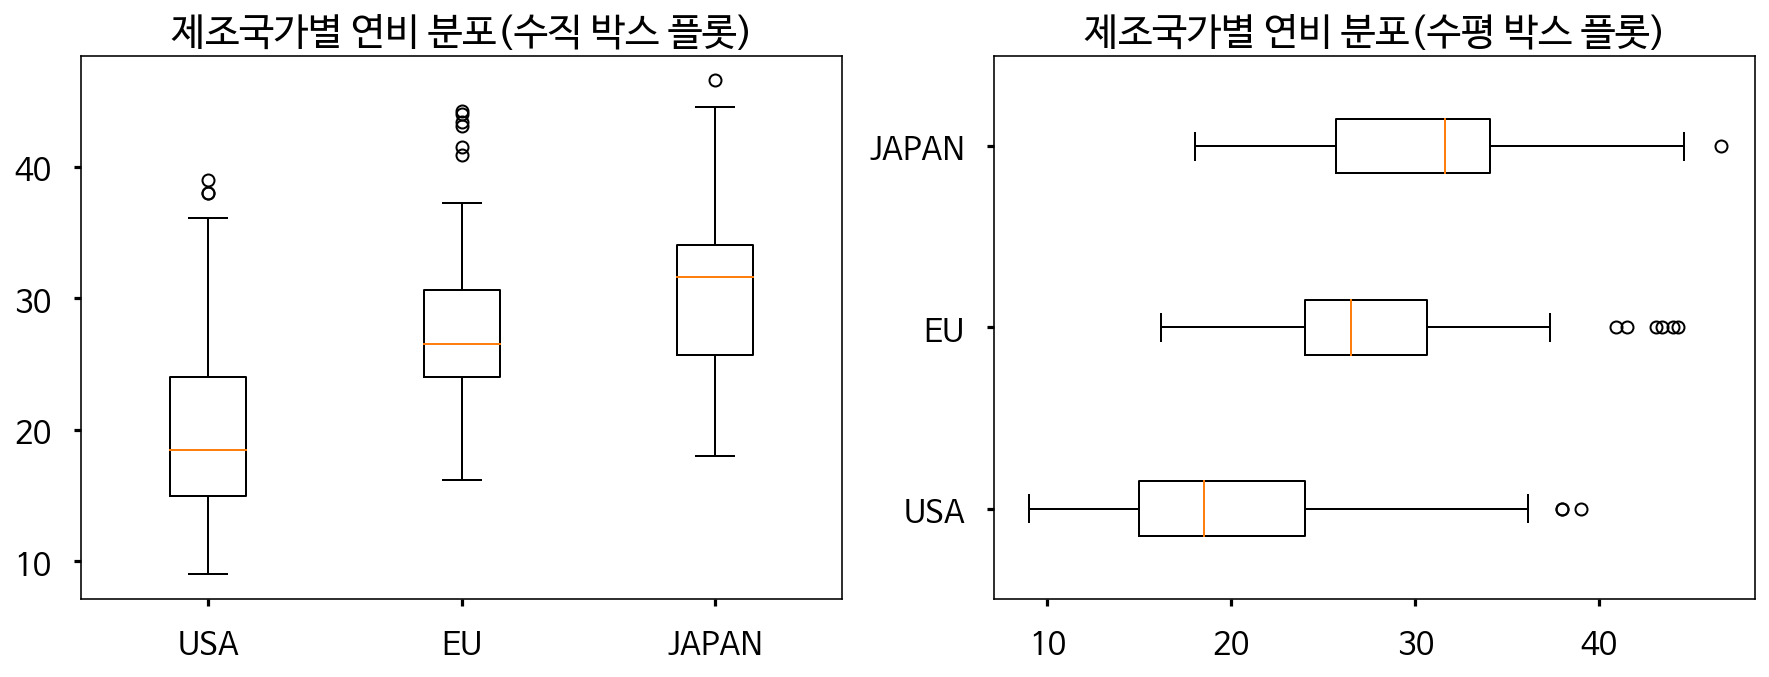

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')            # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

### **예제 4-25 titanic 데이터셋**

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())


   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   cla

### **예제 4-26 회귀선이 있는 산점도**

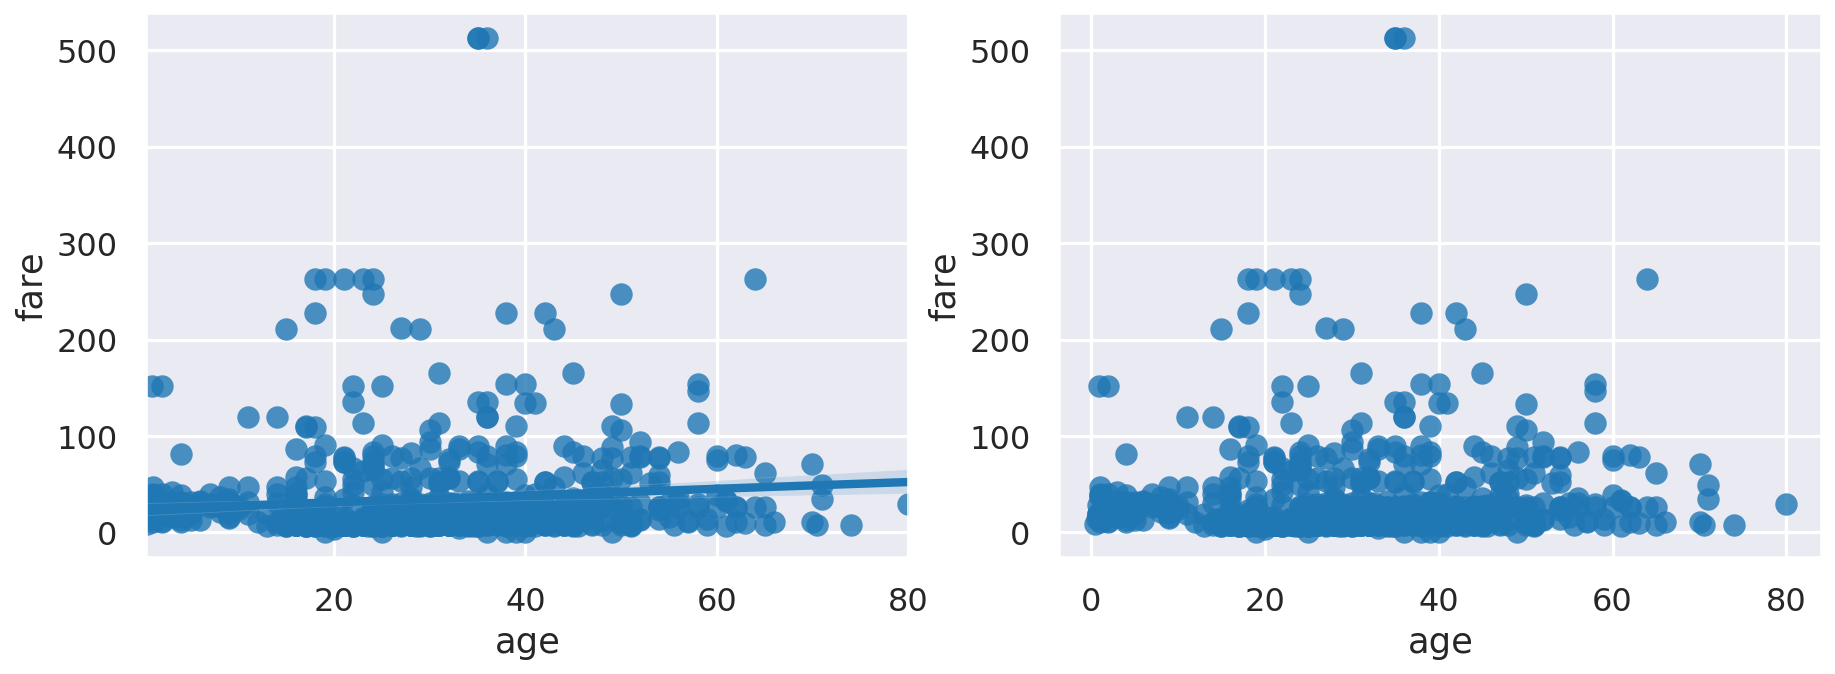

In [ ]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1)         #axe 객체 - 1번째 그래프 

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프        
            fit_reg=False)  #회귀선 미표시

plt.show()